# Analysis of Commit Data

## Loading the Dataset + Constants

In [ ]:
# CPSC310-2021W-T1
"2021"
t1_c0 = "2021-09-20"
t1_c1 = "2021-10-12"
t1_c2 = "2021-11-01"
t1_c3 = "2021-11-29"

# CPSC310-2021W-T2
t2_c0 = "2022-01-21"
t2_c1 = "2022-02-11"
t2_c2 = "2022-03-04"
t2_c3 = "2022-04-01"

# CPSC310-2023W-T2:
t3_c0 = "2024-01-26"
t3_c1 = "2024-02-16"
t3_c2 = "2024-03-15"
t3_c3 = "2024-04-04"

# CPSC310-2024W-T1
t4_c0 = "2024-09-20"
t4_c1 = "2024-10-11"
t4_c2 = "2024-11-01"
t4_c3 = "2024-11-22"

term_1_deadlines = [t1_c0, t1_c1, t1_c2, t1_c3]
term_2_deadlines = [t2_c0, t2_c1, t2_c2, t2_c3]
term_3_deadlines = [t3_c0, t3_c1, t3_c2, t3_c3]
term_4_deadlines = [t4_c0, t4_c1, t4_c2, t4_c3]

term_deadlines = [*term_1_deadlines, *term_2_deadlines, *term_3_deadlines, *term_4_deadlines]

print(term_deadlines)

['2021-09-20', '2021-10-12', '2021-11-01', '2021-11-29', '2022-01-21', '2022-02-11', '2022-03-04', '2022-04-01', '2024-01-26', '2024-02-16', '2024-03-15', '2024-04-04', '2024-09-20', '2024-10-11', '2024-11-01', '2024-11-22']


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [113]:
# Load our dataset
input_filepath = "C:/Bibliothek/Career/UZH/BA BT Bachelor Arbeit Thesis/Code V2/output/commit_stats_all_terms_031125.csv"

df = pd.read_csv(input_filepath, parse_dates=["Date"])

df.drop(columns=['File Count'], inplace=True) # TODO: quick bug fix but fix it in dataset and py driller

n = 5 # amount of projects shown
# colors = ["#F05D5E", "#08A4BD", "#EFA00B", "#25283D"] 
# colors = ["#F05D5E", "#08A4BD", "#EFA00B", "#820263"] 
# colors = ["#F05D5E", "#08A4BD", "#EFA00B", "#85FF9E"]
# colors = ["#fb5607", "#ff006e", "#8338ec", "#3a86ff"]
colors = sns.color_palette("bright")

In [114]:
df.shape

(86483, 18)

## About the data

In [115]:
local_df = df

### Column infos

### Types & Count

In [179]:
local_df[local_df.columns[1]]

1        1
2        1
3        1
4        1
5        1
        ..
86478    4
86479    4
86480    4
86481    4
86482    4
Name: Term, Length: 76187, dtype: int64

In [117]:
local_df["GenAI Period"].unique()

array([False,  True])

In [118]:
local_df["Merge Commit"].nunique()

2

In [119]:
for col in local_df.columns:
    print(f"{col} type: {local_df[col].dtype}")

GenAI Period type: bool
Term type: int64
Project type: int64
Author Name type: object
Author Email type: object
Date type: datetime64[ns]
Repository type: object
Insertions type: int64
Deletions type: int64
Total Lines type: int64
Files Changed type: int64
Diff Lines type: int64
Unit Size (DMM) type: float64
Complexity (DMM) type: float64
Interface (DMM) type: float64
Commit Hash type: object
Merge Commit type: bool
Default Branch type: bool


In [120]:
for col in local_df.columns:    
    if len(local_df[col].unique()) < 5:
        print(f"{col} values: {local_df[col].unique()}")


GenAI Period values: [False  True]
Term values: [1 2 3 4]
Merge Commit values: [False  True]
Default Branch values: [ True]


In [121]:
for col in local_df.columns:    
    if len(local_df[col].unique()) < 5:
        print(f"{col}: {local_df[col].value_counts()} \n")

GenAI Period: GenAI Period
True     52324
False    34159
Name: count, dtype: int64 

Term: Term
4    28546
3    23778
1    17282
2    16877
Name: count, dtype: int64 

Merge Commit: Merge Commit
False    57744
True     28739
Name: count, dtype: int64 

Default Branch: Default Branch
True    86483
Name: count, dtype: int64 



In [122]:
print("Different values per column:")
for col in local_df.columns:
    if len(local_df[col].unique()) >= 5:
        print(f"{col}: {len(local_df[col].unique())} ")


Different values per column:
Project: 681 


Author Name: 1467 
Author Email: 2721 
Date: 325 
Repository: 363 
Insertions: 6666 
Deletions: 2542 
Total Lines: 7613 
Files Changed: 330 
Diff Lines: 7439 
Unit Size (DMM): 5889 
Complexity (DMM): 4123 
Interface (DMM): 3363 
Commit Hash: 86290 


In [123]:
local_df["Repository"][0]

'project_team037'

### Describe

In [124]:
# describe dataframe but first drop non-numeric columns, Term and Project
df_numeric = local_df.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(columns=["Project", "Term"])

# display floats with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

df_float = df_numeric.select_dtypes(include=[np.float64]) 
df_float.describe()


,Unit Size (DMM),Complexity (DMM),Interface (DMM)
count,41525.00,41451.00,41416.00
mean,0.57,0.66,0.70
std,0.42,0.43,0.42
min,0.00,0.00,0.00
25%,0.05,0.08,0.21
50%,0.66,1.00,1.00
75%,1.00,1.00,1.00
max,1.00,1.00,1.00


In [125]:
# don't display decimal numbers
df_int = df_numeric.select_dtypes(include=[np.int64])
# display as integers
pd.set_option('display.float_format', '{:.0f}'.format)
df_int.describe()

,Insertions,Deletions,Total Lines,Files Changed,Diff Lines
count,86483,86483,86483,86483,86483
mean,4604,1949,6553,20,2654
std,239997,134880,277695,327,272887
min,0,0,0,0,-25198695
25%,10,2,19,1,0
50%,56,12,87,3,22
75%,234,53,344,6,147
max,41112591,25198732,41112591,24142,41112591


## Cleaning

### Duplicates Analysis

In [126]:
# Commits with same commit hash but in different terms
# Identify duplicates based on "Commit Hash"
duplicate_commits = df[df.duplicated(subset=["Commit Hash"], keep=False)].groupby("Commit Hash")

# Check if Term is the same
duplicate_commits_diff_terms = duplicate_commits.filter(lambda x: x["Term"].nunique() > 1)
print("Number of commits with same commit hash but in different terms:")
print(len(duplicate_commits_diff_terms))

# Check if Project is the same
print("Number of commits with same commit hash but in same project:")
duplicate_commits_same_project = duplicate_commits.filter(lambda x: x["Project"].nunique() == 1)
print(len(duplicate_commits_same_project))

# Check if Project is different
print("Number of commits with same commit hash but in different projects:")
duplicate_commits_diff_project = duplicate_commits.filter(lambda x: x["Project"].nunique() > 1)
print(len(duplicate_commits_diff_project))

Number of commits with same commit hash but in different terms:
0
Number of commits with same commit hash but in same project:
0
Number of commits with same commit hash but in different projects:
386


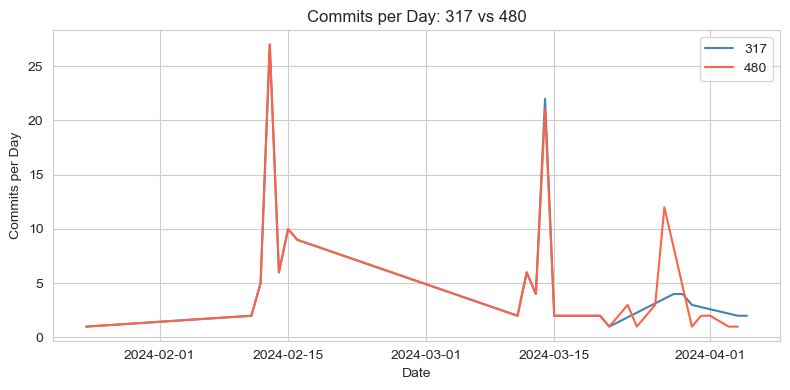

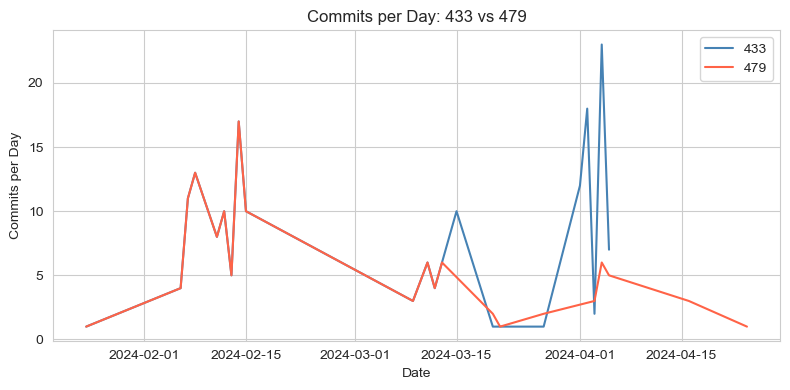

In [127]:
# Show commits per day for involved projects

dfc = df.copy()

# Group by commit hash to find shared commits
shared_hashes = dfc['Commit Hash'].value_counts()
shared_hashes = shared_hashes[shared_hashes > 1].index

# Filter for only commits that appear in multiple projects
df_shared = dfc[dfc['Commit Hash'].isin(shared_hashes)]

projects = df_shared["Project"].unique()

# Use a set to collect unique project pairs 
project_pairs = set()

# Create pairs of projects that share commits so if Project A and B share a commit, we add (A, B)
for commit_hash, group in df_shared.groupby("Commit Hash"):
    project_list = group["Project"].unique()
    for i in range(len(project_list)):
        for j in range(i + 1, len(project_list)):
            a, b = (project_list[i], project_list[j])
            project_pairs.add((int(a), int(b)))

for a, b in project_pairs:
    plt.figure(figsize=(8, 4))

    for project, color in zip([a, b], ['steelblue', 'tomato']):
        df_proj = dfc[dfc['Project'] == project]
        commits_per_day = df_proj.groupby(df_proj['Date'].dt.date).size()
        plt.plot(commits_per_day.index, commits_per_day.values, label=project, color=color)

    plt.xlabel("Date")
    plt.ylabel("Commits per Day")
    plt.title(f"Commits per Day: {a} vs {b}")
    plt.legend()
    plt.tight_layout()
    plt.show()


### Remove Duplicates

In [128]:
# Remove all duplicates
print("\nNumber of commits BEFORE removing duplicates: ", df.shape[0])
# Identify and remove projects involved in shared commits
shared_projects = (
    df.loc[df['Commit Hash'].duplicated(keep=False), 'Project']
    .unique()
)

df = df[~df['Project'].isin(shared_projects)]

print(f"Removed {len(shared_projects)} projects with shared commits:\n{shared_projects}")
print("Number of commits AFTER removing duplicates: ", df.shape[0])


Number of commits BEFORE removing duplicates:  86483
Removed 4 projects with shared commits:
[317 433 479 480]
Number of commits AFTER removing duplicates:  85950


### Remove Invalid Projects

In [129]:
print("Number of projects BEFORE removing incompletes: ", df["Project"].nunique())

# Remove projects with less than 2 commits
df = df.groupby("Project").filter(lambda x: x.shape[0] >= 2)

# Removing outlier nr 14
df = df[df["Project"] != 14]

print("Number of projects AFTER removing incompletes: ", df["Project"].nunique())

Number of projects BEFORE removing incompletes:  677
Number of projects AFTER removing incompletes:  668


### Quantile Filtering

In [130]:
print("\nNumber of projects BEFORE quantile filtering: ", df["Project"].nunique())
print("Number of commits BEFORE quantile filtering: ", df.shape[0])
print(f"Top {n} commits (LOC size): \n{df["Total Lines"].nlargest(n=n)}")


# Define quantile treshold
quantile_threshold = 0.95

# Get the quantile value for each metric individually 
insertions_quantile = df["Insertions"].quantile(quantile_threshold)
deletions_quantile = df["Deletions"].quantile(quantile_threshold)
total_lines_quantile = df["Total Lines"].quantile(quantile_threshold)
files_changed_quantile = df["Files Changed"].quantile(quantile_threshold)

print(f" \nInsertions quantile: {insertions_quantile} \nDeletions quantile: {deletions_quantile} \nTotal lines quantile: {total_lines_quantile} \nFiles changed quantile: {files_changed_quantile}\n")

# Filter the dataframe based on the metric quantile value 
df = df[
    (df["Insertions"] < insertions_quantile) &
    (df["Deletions"] < deletions_quantile) &
    (df["Total Lines"] < total_lines_quantile) &
    (df["Files Changed"] < files_changed_quantile)
]

print("Number of projects AFTER quantile filtering: ", df["Project"].nunique())
print("Number of commits AFTER quantile filtering: ", df.shape[0])
print(f"Top {n} commits (LOC size): \n{df["Total Lines"].nlargest(n=n)}")


Number of projects BEFORE quantile filtering:  668
Number of commits BEFORE quantile filtering:  85861
Top 5 commits (LOC size): 
85949    41112591
85950    41112591
56369    25201272
56364    25198835
56365    25198835
Name: Total Lines, dtype: int64
 
Insertions quantile: 6059.0 
Deletions quantile: 508.0 
Total lines quantile: 8936.0 
Files changed quantile: 28.0

Number of projects AFTER quantile filtering:  668
Number of commits AFTER quantile filtering:  76187
Top 5 commits (LOC size): 
66108    6365
66111    6347
63916    6130
58325    6118
60089    6114
Name: Total Lines, dtype: int64


## About the clean data

In [131]:
local_df = df

### Column infos

### Types & Count

In [132]:
local_df["GenAI Period"].unique()

array([False,  True])

In [133]:
for col in local_df.columns:
    print(f"{col} type: {local_df[col].dtype}")

GenAI Period type: bool
Term type: int64
Project type: int64
Author Name type: object
Author Email type: object
Date type: datetime64[ns]
Repository type: object
Insertions type: int64
Deletions type: int64
Total Lines type: int64
Files Changed type: int64
Diff Lines type: int64
Unit Size (DMM) type: float64
Complexity (DMM) type: float64
Interface (DMM) type: float64
Commit Hash type: object
Merge Commit type: bool
Default Branch type: bool


In [134]:
for col in local_df.columns:    
    if len(local_df[col].unique()) < 5:
        print(f"{col}: {local_df[col].value_counts()} \n")

GenAI Period: GenAI Period
True     46067
False    30120
Name: count, dtype: int64 

Term: Term
4    25355
3    20712
1    15265
2    14855
Name: count, dtype: int64 

Merge Commit: Merge Commit
False    52094
True     24093
Name: count, dtype: int64 

Default Branch: Default Branch
True    76187
Name: count, dtype: int64 



In [135]:
print("Different values per column:")
for col in local_df.columns:
    if len(local_df[col].unique()) >= 5:
        print(f"{col}: {len(local_df[col].unique())} ")


Different values per column:
Project: 668 
Author Name: 1451 
Author Email: 2663 
Date: 321 
Repository: 355 
Insertions: 2386 
Deletions: 508 
Total Lines: 2527 
Files Changed: 28 
Diff Lines: 2657 
Unit Size (DMM): 4796 
Complexity (DMM): 3450 
Interface (DMM): 2821 
Commit Hash: 76187 


### Describe

In [136]:
# describe dataframe but first drop non-numeric columns, Term and Project
df_numeric = local_df.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(columns=["Project", "Term"])

# display floats with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

df_float = df_numeric.select_dtypes(include=[np.float64]) 
df_float.describe()


,Unit Size (DMM),Complexity (DMM),Interface (DMM)
count,36878.00,36807.00,36776.00
mean,0.56,0.65,0.70
std,0.42,0.43,0.43
min,0.00,0.00,0.00
25%,0.01,0.03,0.16
50%,0.65,1.00,1.00
75%,1.00,1.00,1.00
max,1.00,1.00,1.00


In [137]:
# don't display decimal numbers
df_int = df_numeric.select_dtypes(include=[np.int64])
# display as integers
pd.set_option('display.float_format', '{:.0f}'.format)
df_int.describe()

,Insertions,Deletions,Total Lines,Files Changed,Diff Lines
count,76187,76187,76187,76187,76187
mean,183,40,223,4,143
std,523,74,542,4,514
min,0,0,0,0,-504
25%,8,2,15,1,0
50%,41,10,64,2,16
75%,157,40,217,5,94
max,6056,507,6365,27,6048


In [138]:
pd.reset_option('display.float_format')

### Plots

In [139]:
import os 

# Directory for all plots
plots_parent_dir = "plots"

# Create the directory if it doesn't existt
os.makedirs(plots_parent_dir, exist_ok=True)

#### Distributions

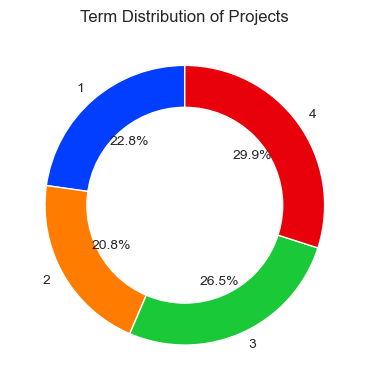

Number of projects:  668
Number of projects from term 1: 152 (22.8%)
Number of projects from term 2: 139 (20.8%)
Number of projects from term 3: 177 (26.5%)
Number of projects from term 4: 200 (29.9%)


In [140]:
# Pie chart for commits and term 
df_temp = df.copy()

value_cnts = df_temp.groupby("Term")["Project"].nunique().sort_index()

sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(4,4)) # Set figure size
plt.title("Term Distribution of Projects")
# plt.suptitle("")
plt.pie(value_cnts, labels=value_cnts.index, autopct="%1.1f%%", startangle=90, colors=colors)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

num_unique_projects = df_temp["Project"].nunique()
print("Number of projects: ", num_unique_projects)

term_commits = []

for term in sorted(df_temp["Term"].unique()):
    term_count = df_temp[df_temp["Term"] == term]["Project"].nunique()
    term_commits.append((term, term_count))
    print(f"Number of projects from term {term}: {term_count} ({round((term_count/num_unique_projects)*100, 1)}%)")


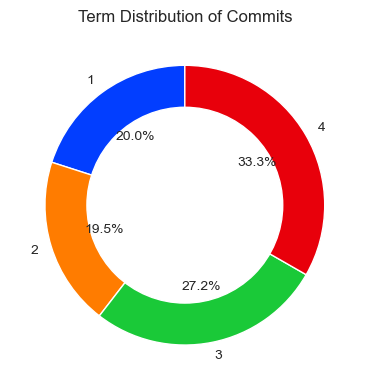

Number of unique commits:  76187
Number of unique commits from term 1: 15265 (20.0%)
Number of unique commits from term 2: 14855 (19.5%)
Number of unique commits from term 3: 20712 (27.2%)
Number of unique commits from term 4: 25355 (33.3%)


In [141]:
# Pie chart for commits and term 
df_temp = df.copy()

value_cnts = df_temp["Term"].value_counts().sort_index()

sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(4,4)) # Set figure size
plt.title("Term Distribution of Commits")
# plt.suptitle("")
plt.pie(value_cnts, labels=value_cnts.index, autopct="%1.1f%%", startangle=90, colors=colors)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

num_unique_commits = df_temp["Commit Hash"].nunique()
print("Number of unique commits: ", num_unique_commits)

term_commits = []

for term in sorted(df_temp["Term"].unique()):
    term_count = df_temp[df_temp["Term"] == term]["Commit Hash"].nunique()
    term_commits.append((term, term_count))
    print(f"Number of unique commits from term {term}: {term_count} ({round((term_count/num_unique_commits)*100, 1)}%)")

#### Normalized Values per Term

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\707873699.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=commits_per_project.index, y=commits_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\707873699.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=commits_per_project.index, y=commits_per_project.values, palette=colors)


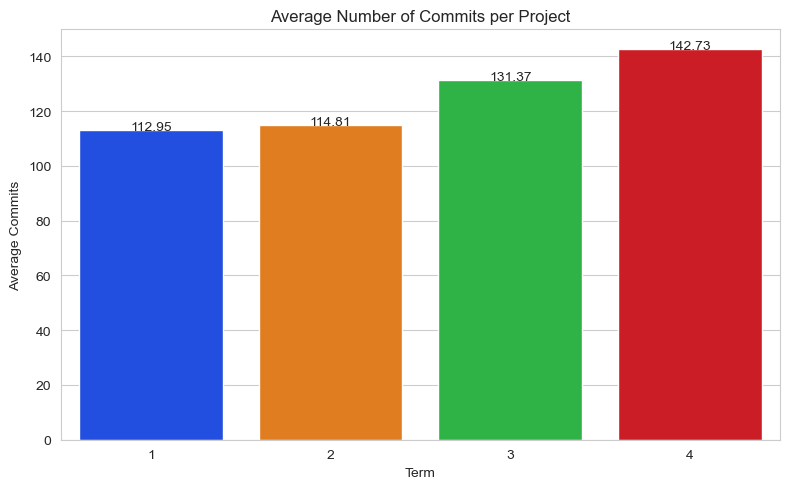

In [142]:
pd.set_option('display.float_format', '{:.0f}'.format) 

# average nr of commits per project per term
commits_per_project = (
    dfc['Term'].value_counts().sort_index() /
    dfc.groupby('Term')['Project'].nunique().sort_index()
)

# Create the barplot
plt.figure(figsize=(8,5))
sns.barplot(x=commits_per_project.index, y=commits_per_project.values, palette=colors)

for i, v in enumerate(commits_per_project.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
    
# Labels and title
plt.xlabel('Term')
plt.ylabel('Average Commits')
plt.title('Average Number of Commits per Project')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

pd.reset_option('display.float_format')

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


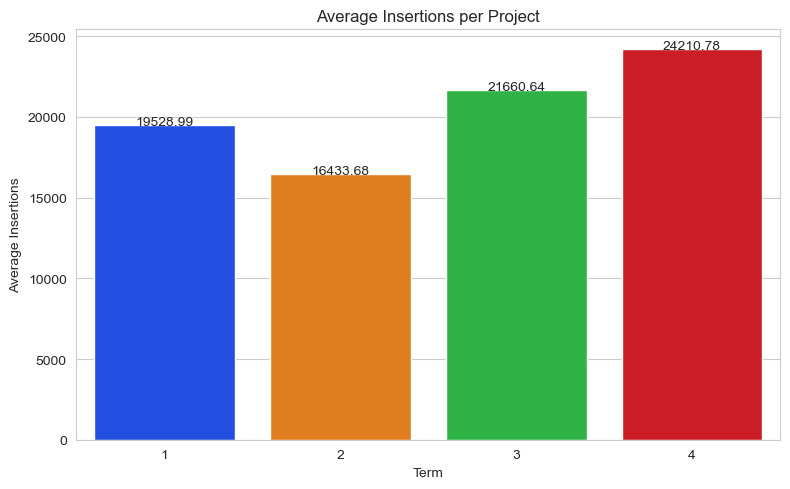

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


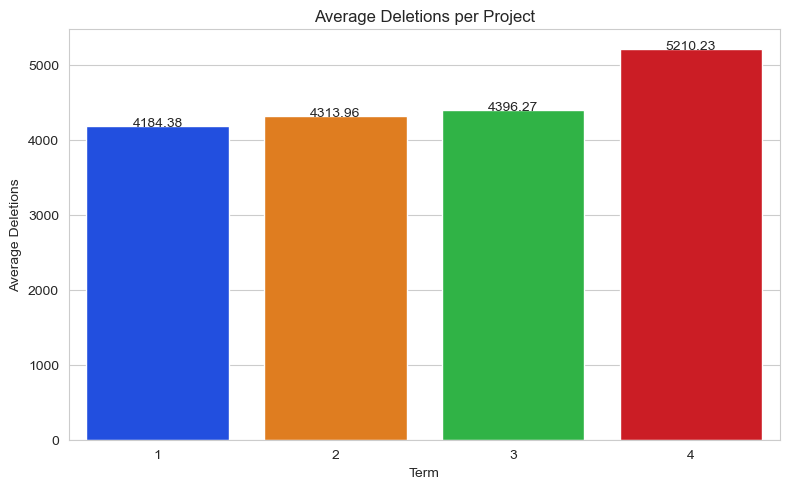

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


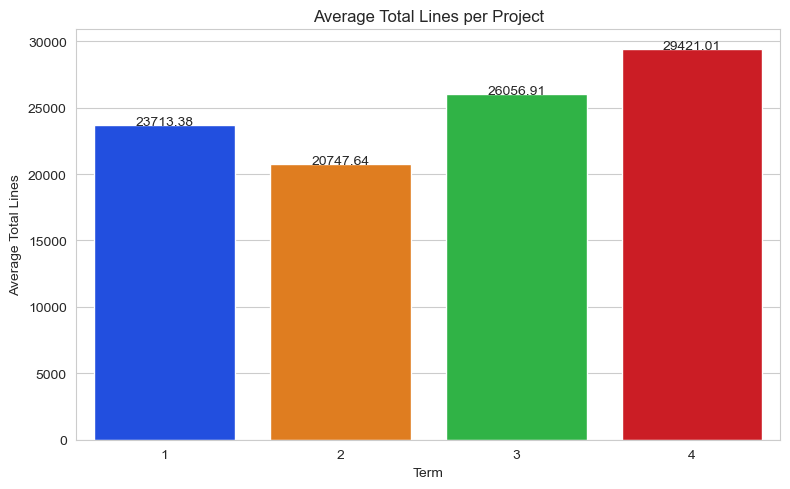

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


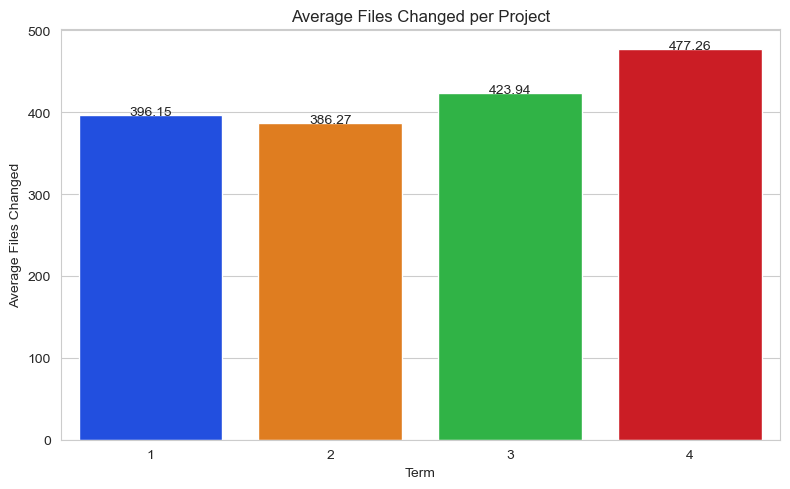

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


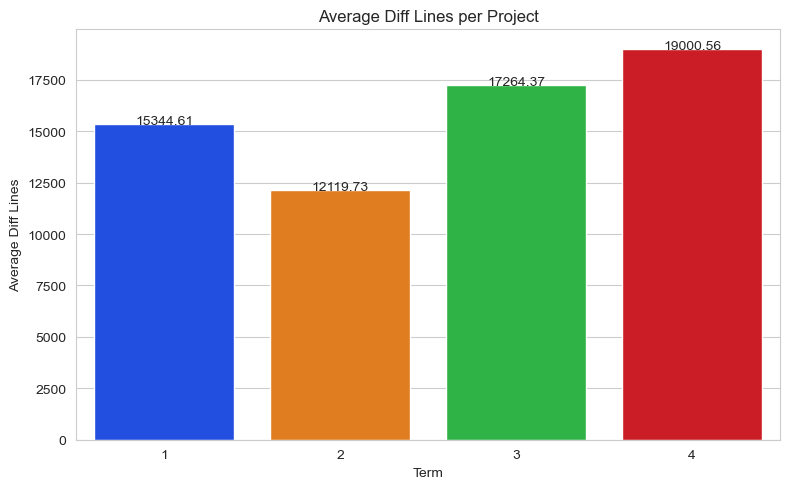

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


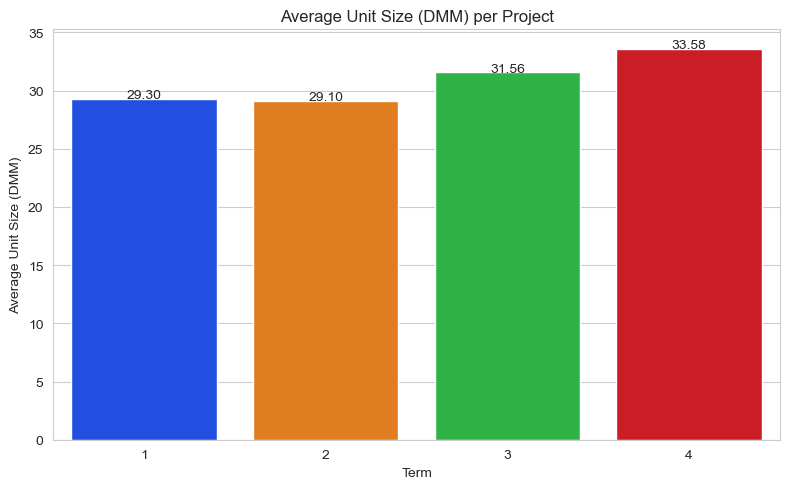

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


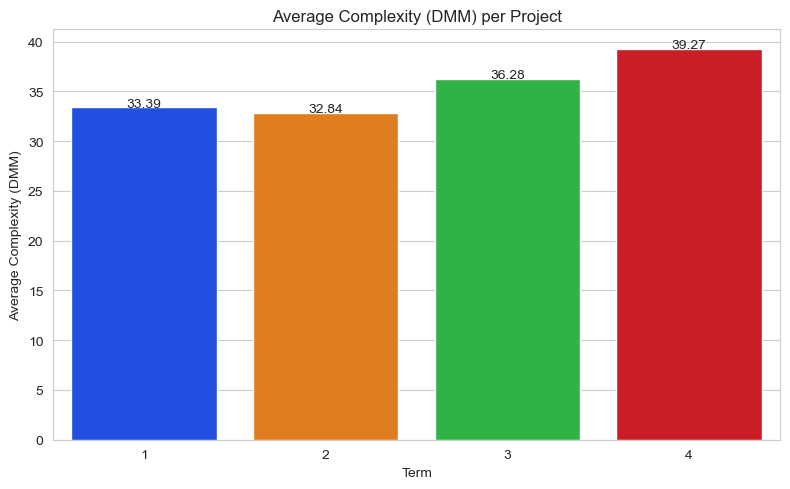

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\926769696.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


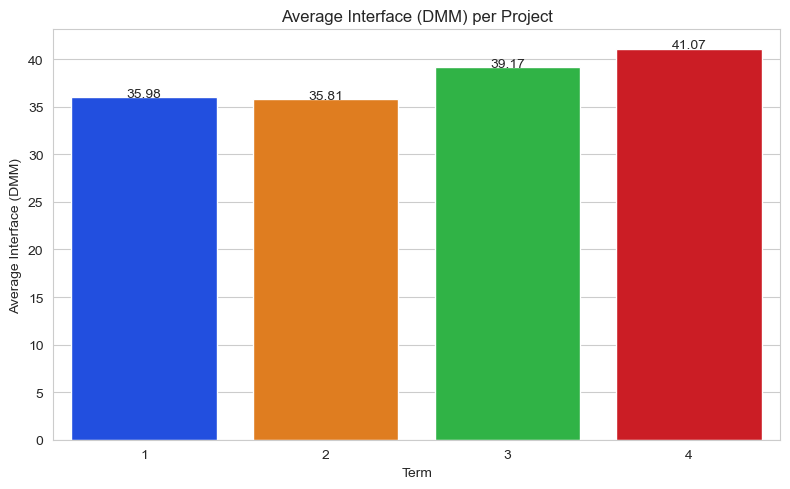

In [143]:
project_count = df.groupby('Term')['Project'].nunique().sort_index()

df_numeric = df.select_dtypes(include=[np.number])
df_metrics = df_numeric.drop(columns=["Project", "Term"])

for metric in df_metrics.columns:
    metric_per_project = df.groupby('Term')[metric].sum().sort_index() / project_count

    # Create the barplot
    plt.figure(figsize=(8,5))
    sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)

    for i, v in enumerate(metric_per_project.values):
        plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
        
    # Labels and title
    plt.xlabel('Term')
    plt.ylabel(f"Average {metric}")
    plt.title(f"Average {metric} per Project")
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

In [144]:
# df_numeric = df.select_dtypes(include=[np.number])
# df_metrics = df_numeric.drop(columns=["Project", "Term"])

# for metric in df_metrics.columns:
#     # Mean and standard deviation per Term
#     metric_mean = df.groupby('Term')[metric].mean().sort_index()
#     metric_std = df.groupby('Term')[metric].std().sort_index()

#     print(metric_mean)
#     print(metric_std)
#     plt.figure(figsize=(8,5))
#     sns.barplot(
#         x=metric_mean.index,
#         y=metric_mean.values,
#         palette=colors,
#         yerr=metric_std.values
#     )

#     for i, v in enumerate(metric_mean.values):
#         plt.text(i, v + 0.05, f"{v:.2f}", ha='center')

#     plt.xlabel('Term')
#     plt.ylabel(f"Average {metric}")
#     plt.title(f"Average {metric} per Commit (± Std)")
#     plt.xticks(rotation=0)
#     plt.tight_layout()
#     plt.show()

In [145]:
# commit_count = df_temp["Term"].value_counts().sort_index()

# df_numeric = df.select_dtypes(include=[np.number])
# df_metrics = df_numeric.drop(columns=["Project", "Term"])

# for metric in df_metrics.columns:
#     metric_per_project = df.groupby('Term')[metric].sum().sort_index() / commit_count

#     plt.figure(figsize=(8,5))
#     sns.barplot(
#         data=df, 
#         x='Term', 
#         y=metric, 
#         palette=colors, 
#         estimator='mean', 
#         errorbar='sd'   # or 'se' for standard error
#     )
#     plt.xlabel('Term')
#     plt.ylabel(f"Average {metric}")
#     plt.title(f"Average {metric} per Commit (with error bars)")
#     plt.tight_layout()
#     plt.show()

Index(['Insertions', 'Deletions', 'Total Lines', 'Files Changed', 'Diff Lines',
       'Unit Size (DMM)', 'Complexity (DMM)', 'Interface (DMM)'],
      dtype='object')


C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


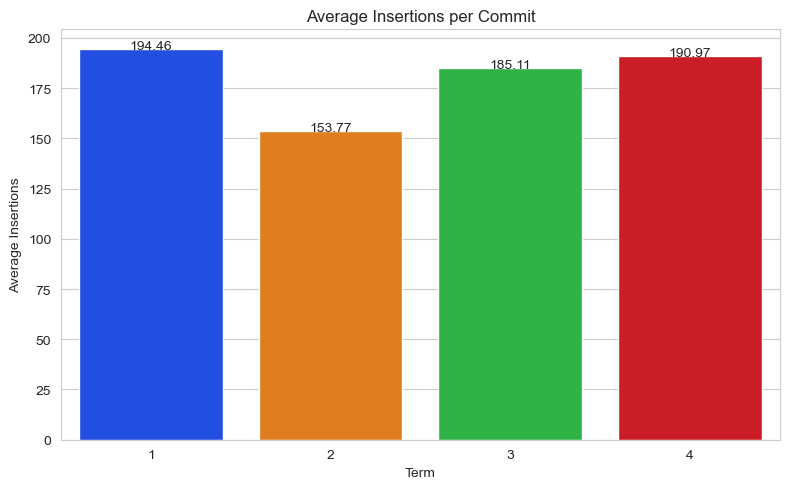

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


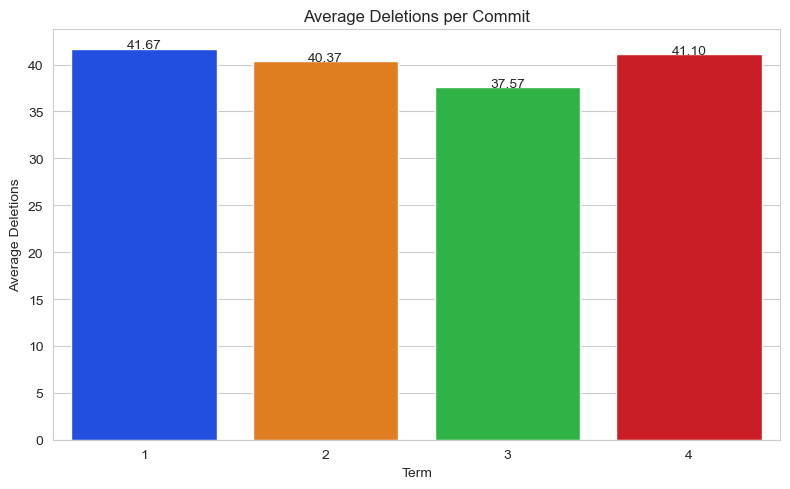

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


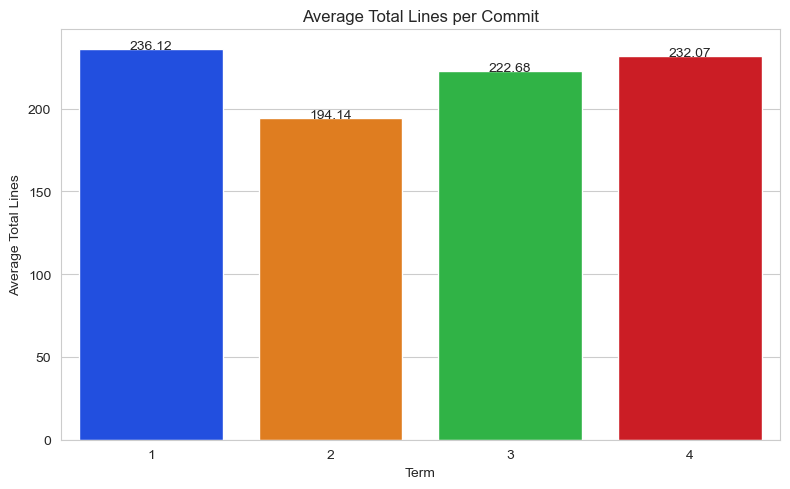

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


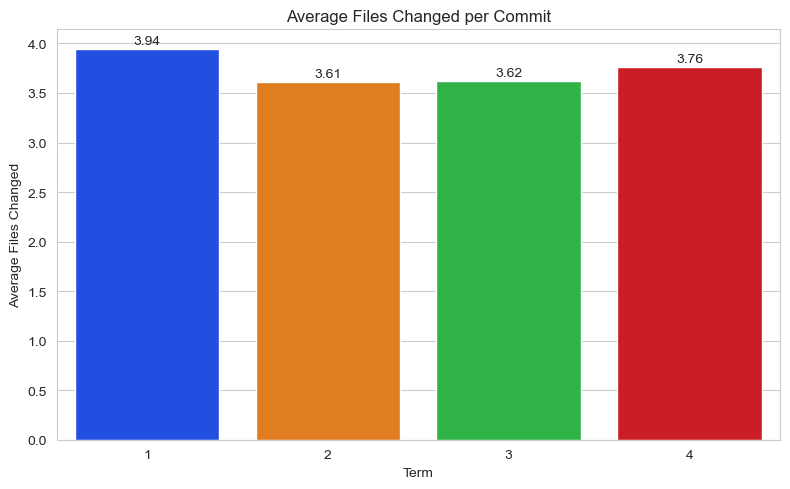

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


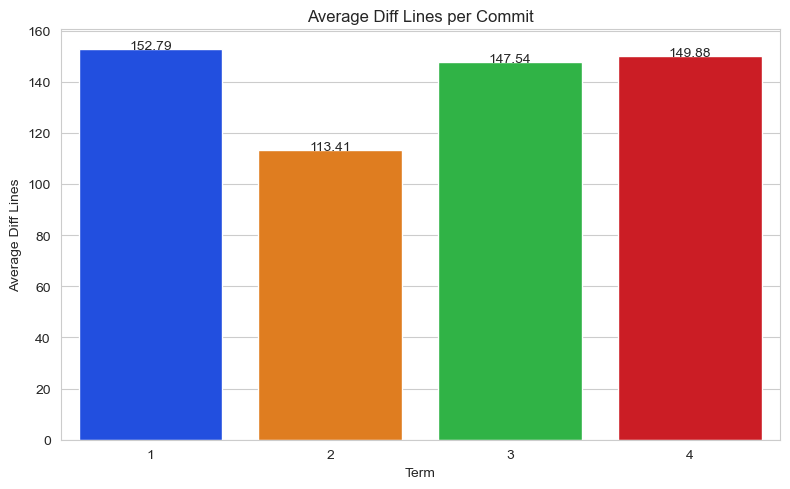

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


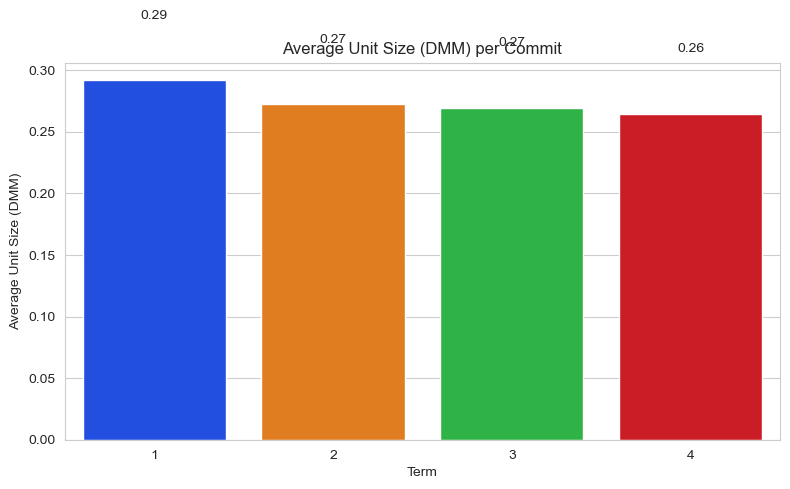

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


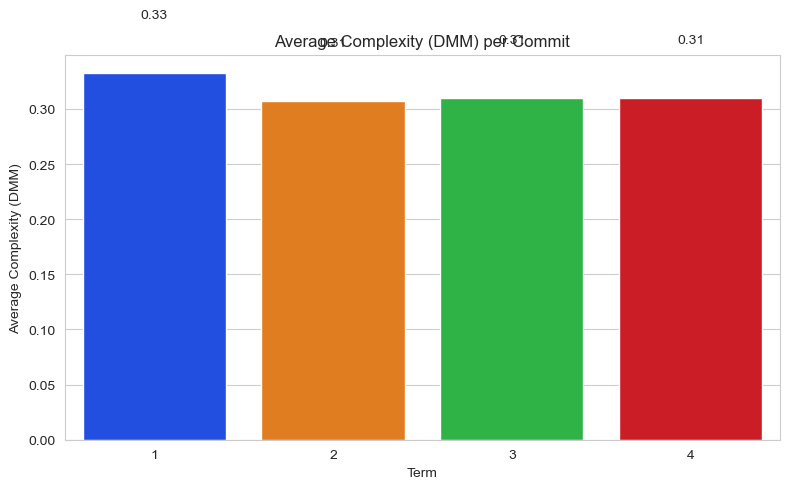

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2238890130.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)


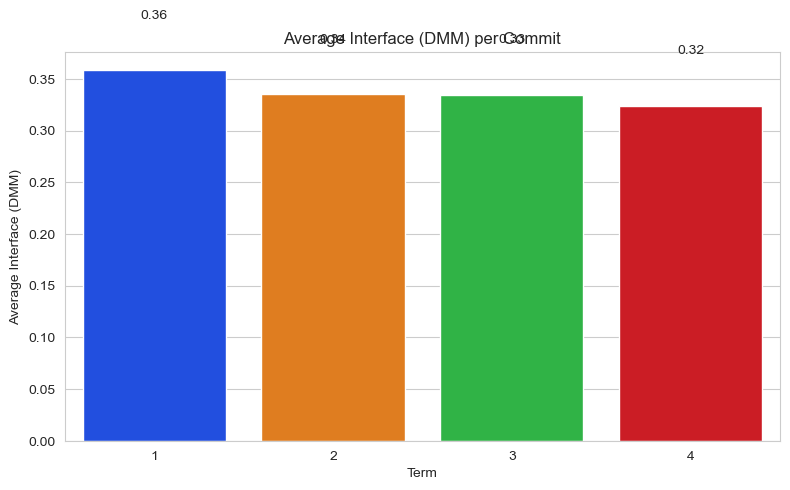

In [146]:
commit_count = df_temp["Term"].value_counts().sort_index()

df_numeric = df.select_dtypes(include=[np.number])
df_metrics = df_numeric.drop(columns=["Project", "Term"])

print (df_metrics.columns)

for metric in df_metrics.columns:
    metric_per_project = df.groupby('Term')[metric].sum().sort_index() / commit_count

    # Create the barplot
    plt.figure(figsize=(8,5))
    sns.barplot(x=metric_per_project.index, y=metric_per_project.values, palette=colors)
    # sns.barplot(x='Term', y=metric, data=df, errorbar='sd', palette=colors)

    for i, v in enumerate(metric_per_project.values):
        plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
        
    # Labels and title
    plt.xlabel('Term')
    plt.ylabel(f"Average {metric}")
    plt.title(f"Average {metric} per Commit")
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

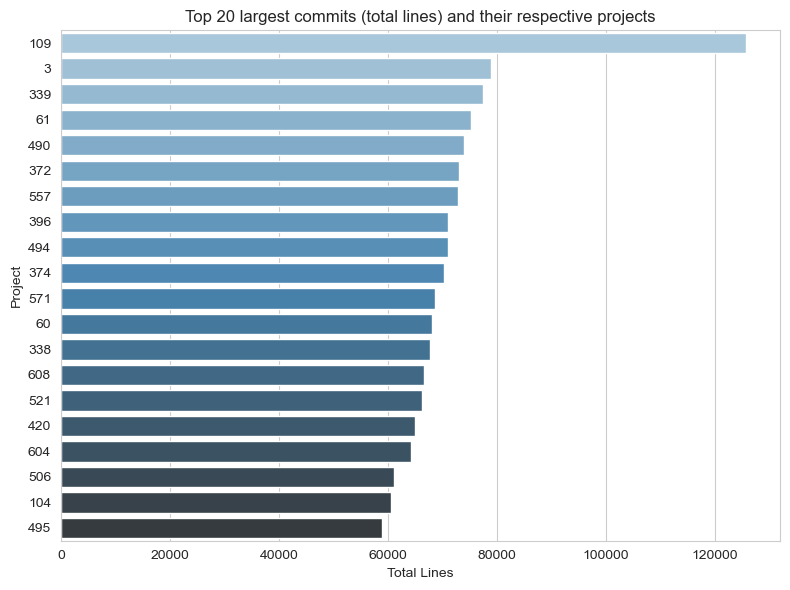

In [147]:

df_temp["Term"].value_counts().sort_index()
# Plot for top 20 repositories with the largest commits

df_temp = df.copy()
    
top_repos = df_temp.groupby("Project")["Total Lines"].sum().sort_values(ascending=False).head(20).reset_index()

top_repos['Project'] = pd.Categorical(top_repos['Project'], categories=top_repos['Project'], ordered=True)

top_repos['hue_dummy'] = top_repos['Project']

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_repos,
    x="Total Lines",
    y="Project",
    hue="hue_dummy",
    palette="Blues_d",
    dodge=False, 
    orient="h",
    legend=False 
)

plt.xlabel("Total Lines")
plt.ylabel("Project")
plt.title("Top 20 largest commits (total lines) and their respective projects")
plt.tight_layout()
plt.show()

## Data distributions of the metrics insertions, deletions, total lines, diff, files changed 

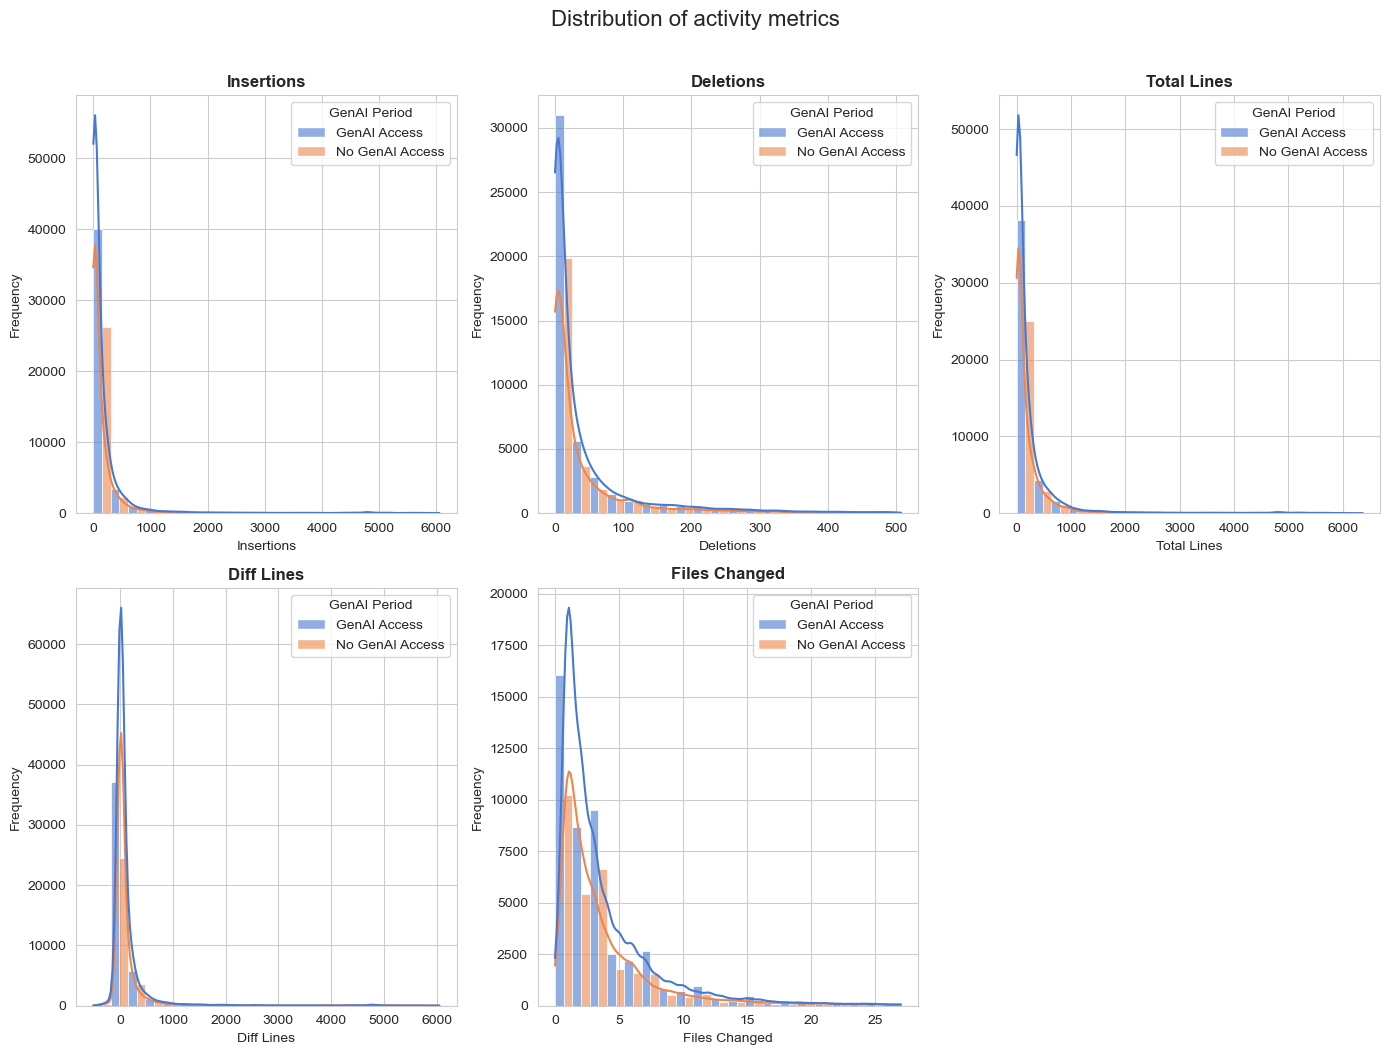

In [148]:
import matplotlib.gridspec as gridspec

# Metrics that we will plot histogram to show data distribution for
metrics = ["Insertions", "Deletions", "Total Lines", 
           "Diff Lines", "Files Changed"]
# Create grid figure
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig)

df_temp = df.copy()
df_temp["GenAI Period"] = df_temp["GenAI Period"].map({True: "GenAI Access", False: "No GenAI Access"})

# Plot each metric
for i, metric in enumerate(metrics):
    g = fig.add_subplot(gs[i])

    sns.histplot(
        data=df_temp,
        x=metric,
        hue="GenAI Period",
        kde=True,
        multiple="dodge",
        alpha=0.6,
        bins=20,
        ax=g,
        palette="muted",
        hue_order=["GenAI Access", "No GenAI Access"],
    )

    g.set_title(metric, weight="bold")
    g.set_xlabel(f"{metric}")
    g.set_ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Distribution of activity metrics", fontsize=16, y=1.05)


file_name = "histo_data_distribution.pdf"
full_path = os.path.join(plots_parent_dir, file_name)
plt.savefig(full_path, format="pdf")
plt.show()

## Data Visualisation

### Time spans between Milestones

In [149]:
# First print first and last commit date per term
def first_and_last_commit_dates(term_deadlines):
    for i in range(0, len(term_deadlines), 4):
        term = (i // 4) + 1
        term_commits = df[df["Term"] == term]
        if not term_commits.empty:
            first_commit_date = term_commits["Date"].min().date()
            last_commit_date = term_commits["Date"].max().date()
            print(f"Term {term}: First Commit Date: {first_commit_date}, Last Commit Date: {last_commit_date}")
        else:
            print(f"Term {term}: No commits found.")

first_and_last_commit_dates(term_deadlines)

Term 1: First Commit Date: 2021-09-08, Last Commit Date: 2022-08-11
Term 2: First Commit Date: 2022-01-25, Last Commit Date: 2022-04-08
Term 3: First Commit Date: 2024-01-06, Last Commit Date: 2024-04-08
Term 4: First Commit Date: 2024-09-09, Last Commit Date: 2024-11-29


In [150]:
# Calculate time spans in days between milestones per term
nr_of_milestones_per_turn = 4

print("Time spans between milestones (in days) for each term")
for i in range(0, len(term_deadlines), nr_of_milestones_per_turn):
    term = (i // nr_of_milestones_per_turn) + 1
    dates = []
    for j in range(nr_of_milestones_per_turn):
        date_str = term_deadlines[i + j]
        date_obj = dt.datetime.strptime(date_str, "%Y-%m-%d").date()
        dates.append(date_obj)
    
    spans = []
    for k in range(3):
        span = (dates[k + 1] - dates[k]).days
        spans.append(span)
    
    print(f"{term}: {spans}")

print(f"Example: Time span between milestone c1 and c2 in term 3 are {28} days.")

Time spans between milestones (in days) for each term
1: [22, 20, 28]
2: [21, 21, 28]
3: [21, 28, 20]
4: [21, 21, 21]
Example: Time span between milestone c1 and c2 in term 3 are 28 days.


### Time vs Commits

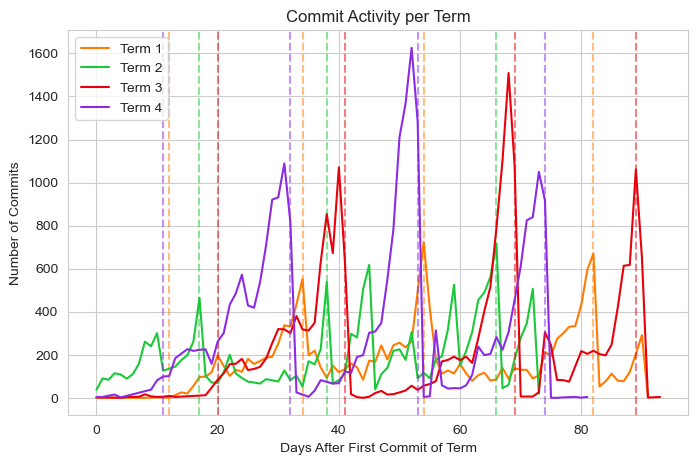

In [151]:

# Number of commits per day relative to start
plt.figure(figsize=(8,5))

TERM_PATHS = [
    "TERM_1_PATH",
    "TERM_2_PATH",
    "TERM_3_PATH",
    "TERM_4_PATH"
]

dfc = df.copy()

for i, term in enumerate(TERM_PATHS, start=1):
    df_term = dfc[dfc['Term'] == i].copy()
    df_term['Date'] = pd.to_datetime(df_term['Date'])
    first_day = df_term['Date'].min()
    df_term['Days After Start'] = (df_term['Date'] - first_day).dt.days
    # print(df_term['Days After Start'].sort_values(ascending=False).head())
    df_term = df_term[df_term['Days After Start'] <= 95]
    commits_per_day = df_term.groupby('Days After Start').size()
    plt.plot(commits_per_day.index, commits_per_day.values, label=f"Term {i}", color=colors[i])

    # add vertical lines for deadlines --> Trash
    deadlines = term_deadlines[(i-1)*4:i*4]
    for deadline in deadlines:
        deadline_date = pd.to_datetime(deadline)
        days_after_start = (deadline_date - first_day).days
        if 0 <= days_after_start <= 95:
            plt.axvline(x=days_after_start, color=colors[i], linestyle='--', alpha=0.5)

    # Get Lines on to same level
    # add column with data per commit that indicates days after c0 for each term

plt.xlabel("Days After First Commit of Term")
plt.ylabel("Number of Commits")
plt.title("Commit Activity per Term")
plt.legend()
plt.show()



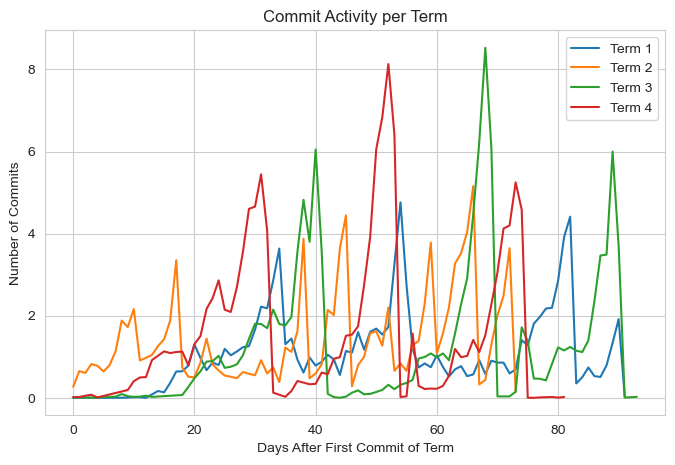

In [152]:
project_count = df.groupby('Term')['Project'].nunique().sort_index()

# Number of commits per day relative to start
plt.figure(figsize=(8,5))

TERM_PATHS = [
    "TERM_1_PATH",
    "TERM_2_PATH",
    "TERM_3_PATH",
    "TERM_4_PATH"
]

dfc = df.copy()

for i, term in enumerate(TERM_PATHS, start=1):
    df_term = dfc[dfc['Term'] == i].copy()
    df_term['Date'] = pd.to_datetime(df_term['Date'])
    first_day = df_term['Date'].min()
    df_term['Days After Start'] = (df_term['Date'] - first_day).dt.days
    # print(df_term['Days After Start'].sort_values(ascending=False).head())
    df_term = df_term[df_term['Days After Start'] <= 95]
    commits_per_day = df_term.groupby('Days After Start').size() / project_count.values[i-1]
    plt.plot(commits_per_day.index, commits_per_day.values, label=f"Term {i}")

plt.xlabel("Days After First Commit of Term")
plt.ylabel("Number of Commits")
plt.title("Commit Activity per Term")
plt.legend()
plt.show()

# print(commits_per_day)

In [153]:
# how complex was an project in the term on average after so many

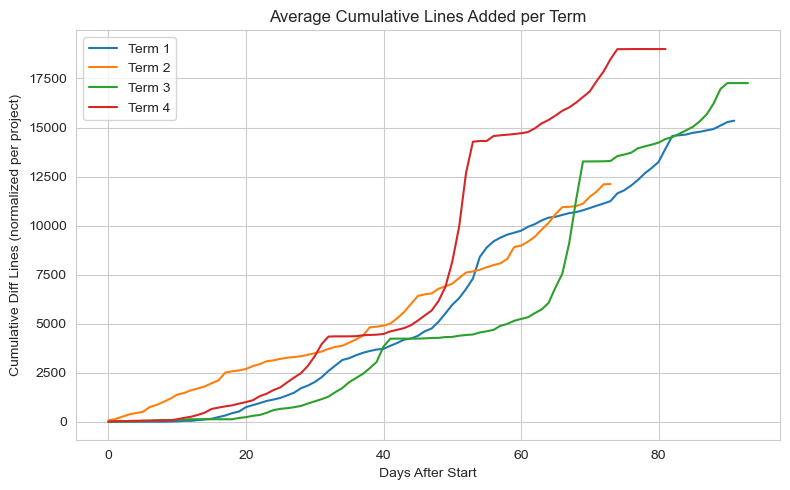

In [154]:
# how many lines were added to the project on average after x days?


# for each commit add a column how many days after start it was made
def first_day(term):
    return startdates[term]


df_copy = df.copy()
startdates = df.groupby('Term')['Date'].min()
df_copy['Days After Start'] = (
    df_copy['Date'] - df_copy['Term'].map(startdates)
).dt.days


# Use Diff Lines

# normalise
# Compute projects per term (for normalization)
projects_per_term = df.groupby('Term')['Project'].nunique()

df_copy = df_copy[df_copy['Days After Start'] <= 95]

# Prepare data: cumulative sum of diff lines by day and term
df_grouped = (
    df_copy.groupby(['Term', 'Days After Start'])['Diff Lines']
    .sum()
    .groupby(level=0)
    .cumsum()
    .reset_index()
)

# Normalize by number of projects per term
df_grouped['Normalized Diff Lines'] = df_grouped.apply(
    lambda row: row['Diff Lines'] / projects_per_term[row['Term']], axis=1
)

# Plot
plt.figure(figsize=(8,5))
for term, data in df_grouped.groupby('Term'):
    plt.plot(data['Days After Start'], data['Normalized Diff Lines'], label=f"Term {term}")

plt.xlabel('Days After Start')
plt.ylabel('Cumulative Diff Lines (normalized per project)')
plt.title('Average Cumulative Lines Added per Term')
plt.legend()
plt.tight_layout()
plt.show()

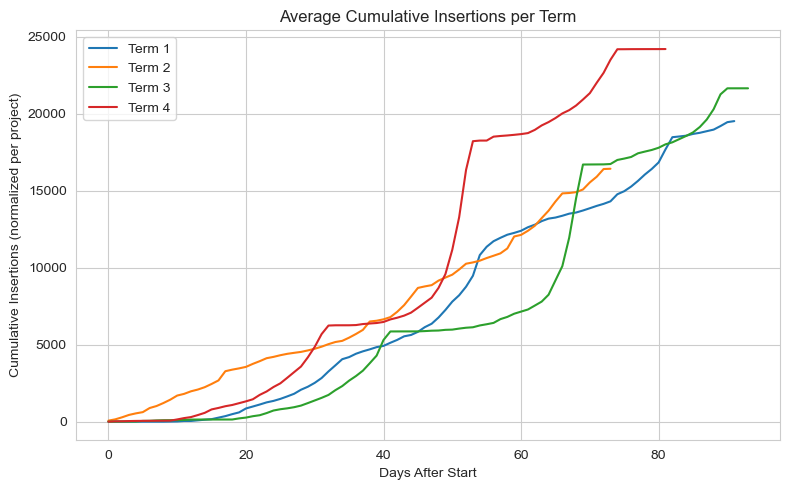

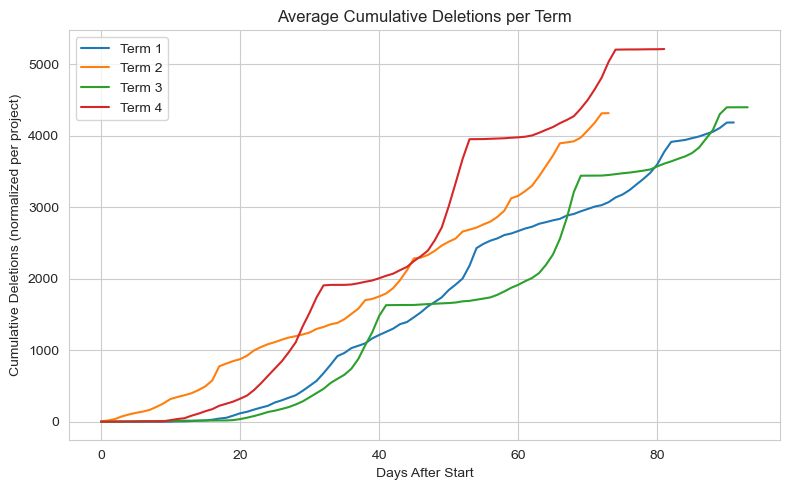

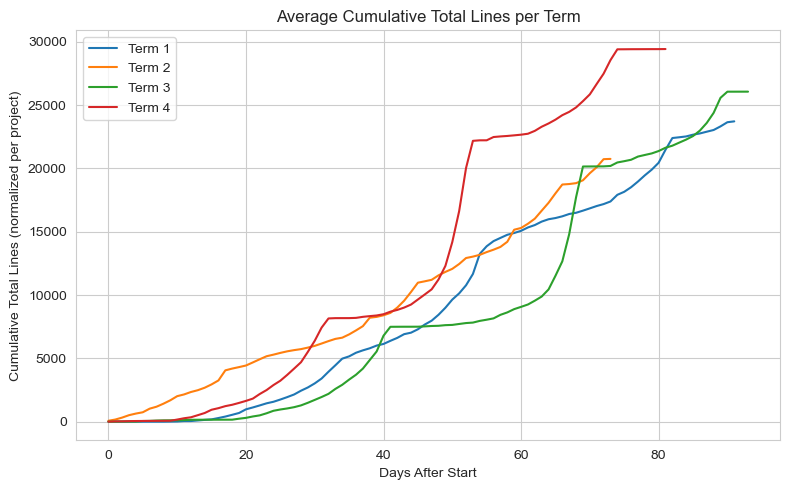

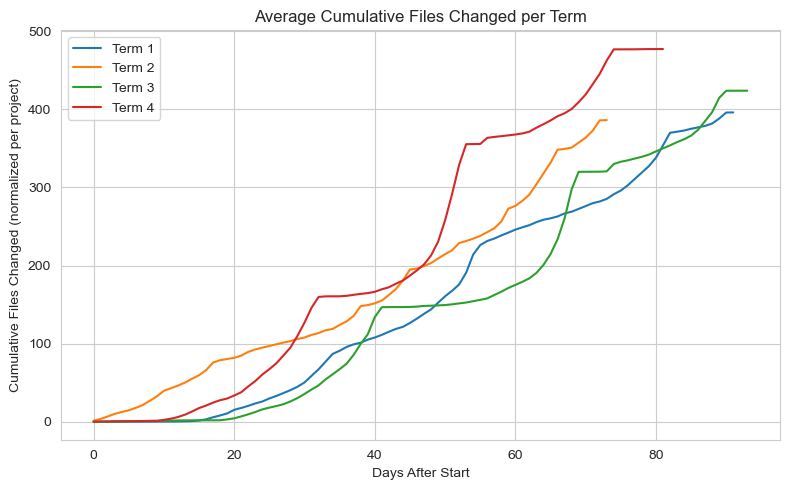

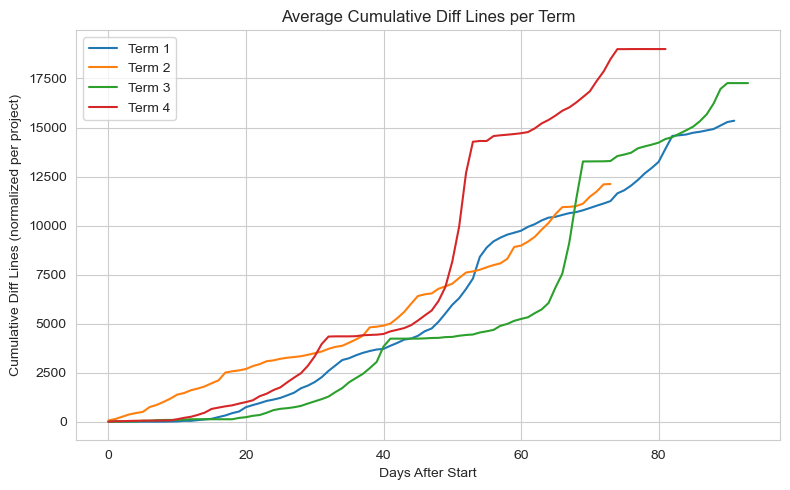

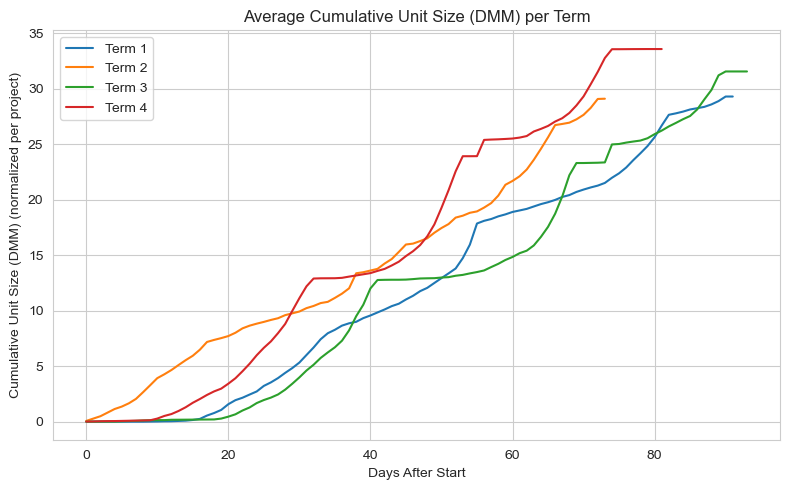

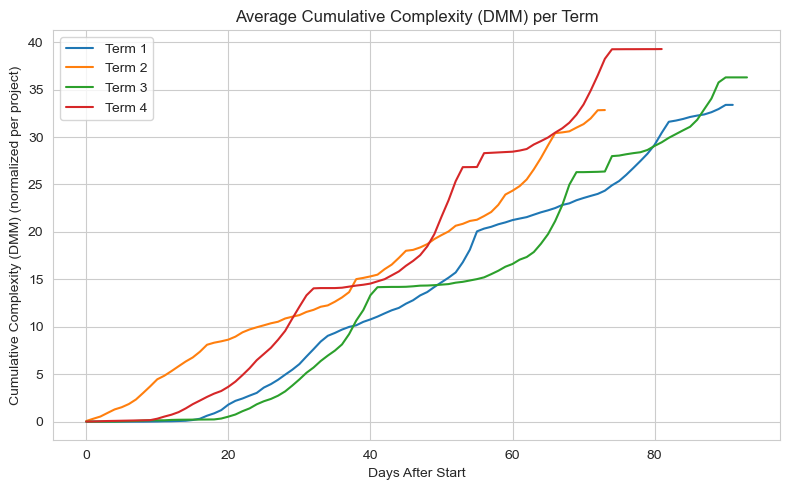

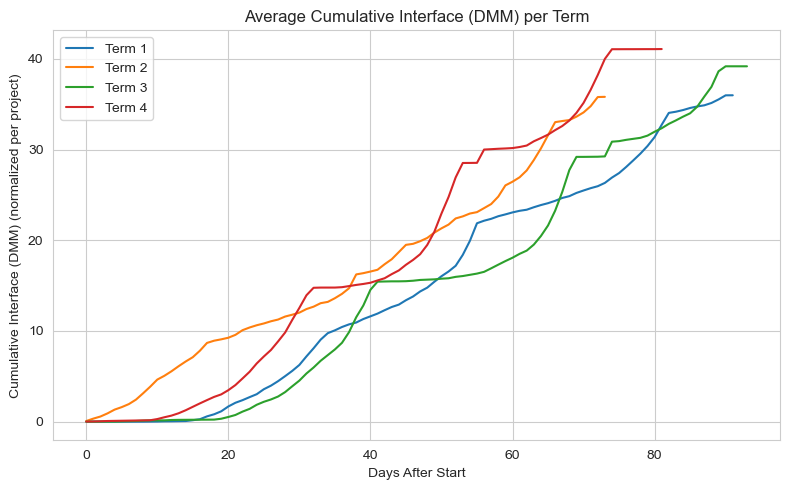

In [155]:
# how many lines were added to the project on average after x days?


# for each commit add a column how many days after start it was made
def first_day(term):
    return startdates[term]


df_copy = df.copy()
startdates = df.groupby('Term')['Date'].min()
df_copy['Days After Start'] = (
    df_copy['Date'] - df_copy['Term'].map(startdates)
).dt.days


# Compute projects per term (for normalization)
projects_per_term = df.groupby('Term')['Project'].nunique()

df_copy = df_copy[df_copy['Days After Start'] <= 95] # remove outliers


df_numeric = df.select_dtypes(include=[np.number])
df_metrics = df_numeric.drop(columns=["Project", "Term"])

for metric in df_metrics.columns:
    # Prepare data: cumulative sum of diff lines by day and term
    df_grouped = (
        df_copy.groupby(['Term', 'Days After Start'])[metric]
        .sum()
        .groupby(level=0)
        .cumsum()
        .reset_index()
    )

    # Normalize by number of projects per term
    df_grouped[f'Normalized {metric}'] = df_grouped.apply(
        lambda row: row[metric] / projects_per_term[row['Term']], axis=1
    )

    # Plot
    plt.figure(figsize=(8,5))
    for term, data in df_grouped.groupby('Term'):
        plt.plot(data['Days After Start'], data[f'Normalized {metric}'], label=f"Term {term}")

    plt.xlabel('Days After Start')
    plt.ylabel(f'Cumulative {metric} (normalized per project)')
    plt.title(f'Average Cumulative {metric} per Term')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [156]:
df.columns

Index(['GenAI Period', 'Term', 'Project', 'Author Name', 'Author Email',
       'Date', 'Repository', 'Insertions', 'Deletions', 'Total Lines',
       'Files Changed', 'Diff Lines', 'Unit Size (DMM)', 'Complexity (DMM)',
       'Interface (DMM)', 'Commit Hash', 'Merge Commit', 'Default Branch'],
      dtype='object')

In [157]:
# for each term find the first commit
df.groupby('Term')['Date'].min()

Term
1   2021-09-08
2   2022-01-25
3   2024-01-06
4   2024-09-09
Name: Date, dtype: datetime64[ns]

### Duplicated Commits Development

# GenAI Keywords in Commit Messages

#### subsection random attempt

In [158]:

# get file 
filepath = "C:/Bibliothek/Career/UZH/BA BT Bachelor Arbeit Thesis/Code V2/output/commit_messages_term_3_121125.csv"
# filepath = "output/commit_messages_term_1_121125.csv"
# filepath = "./output/.commit_messages_term_1_121125.csv"
# filepath = "./output/.commit_messages_term_1_121125.csv"
# filepath = "./output/.commit_messages_term_1_121125.csv"

df_messages = pd.read_csv(filepath)

# Define genAI keywords
genAI_keywords = ["genAI", "chatGPT", "copilot", "bard", "gpt-3", "gpt-4", "ai-assisted", "ai assisted", "ai-generated", "ai generated", "generative ai", "ai code", "ai-generated code", "ai assisted code", "artificial intelligence", "machine learning", "deep learning", "neural network", "co pilot", "co-pilot", "chat GPT", "chat-gpt", "open AI", "openAI", "GPT", "prompt", "auto-complete", "auto complete", "code completion", "ai tool", "ai-tool", "large language model"]
# genAI_keywords = ["GPT", "Chat", "pilot", "auto", "prompt"]

# Search for keywords in commit messages
df_messages['Contains GenAI Keyword'] = df_messages['Commit Message'].str.contains(
    '|'.join(genAI_keywords), case=False, na=False
)

print(df_messages['Contains GenAI Keyword'].value_counts())
# df_messages[df_messages['Contains GenAI Keyword']]['Commit Message'].head()
y = df_messages[df_messages['Contains GenAI Keyword']]['Commit Message']
for msg in y.head(20):
    print(msg[0])

# --> there are some genAI related commit messages - we need to check code for further analysis 


Contains GenAI Keyword
False    23769
True         9
Name: count, dtype: int64
p
a
a
A
a
c
m
r
-


In [159]:
# Find all commits that have a genAI Tag 



#### Checks

In [160]:
# Commits per project
df.groupby('Project')['Commit Hash'].nunique().sort_values(ascending=False).describe()


count    668.000000
mean     114.052395
std       55.320806
min        5.000000
25%       76.750000
50%      105.500000
75%      141.000000
max      335.000000
Name: Commit Hash, dtype: float64

Choose repo with around 75 commits to have a repo with not that many commits but valid one

In [161]:
x = df.groupby('Project')['Commit Hash'].nunique()
# get all projects with more than 100 commits
x = x[x > 75]
y = x[x < 80]
y

Project
31     78
33     76
38     77
83     76
99     79
116    78
256    77
258    76
281    79
292    79
375    77
425    77
453    77
610    79
Name: Commit Hash, dtype: int64

In [162]:
# for each project in y find first and last commit date
for project in y.index:
    project_commits = df[df['Project'] == project]
    first_commit_date = project_commits['Date'].min()
    last_commit_date = project_commits['Date'].max()
    print(f"Project {project}: First Commit Date: {first_commit_date}, Last Commit Date: {last_commit_date}")

Project 31: First Commit Date: 2021-09-28 00:00:00, Last Commit Date: 2021-11-28 00:00:00
Project 33: First Commit Date: 2021-09-26 00:00:00, Last Commit Date: 2021-12-06 00:00:00
Project 38: First Commit Date: 2021-10-12 00:00:00, Last Commit Date: 2021-12-07 00:00:00
Project 83: First Commit Date: 2021-09-28 00:00:00, Last Commit Date: 2021-12-07 00:00:00
Project 99: First Commit Date: 2021-09-26 00:00:00, Last Commit Date: 2021-11-28 00:00:00
Project 116: First Commit Date: 2021-09-26 00:00:00, Last Commit Date: 2021-11-27 00:00:00
Project 256: First Commit Date: 2022-02-03 00:00:00, Last Commit Date: 2022-04-07 00:00:00
Project 258: First Commit Date: 2022-01-28 00:00:00, Last Commit Date: 2022-04-01 00:00:00
Project 281: First Commit Date: 2022-02-02 00:00:00, Last Commit Date: 2022-04-07 00:00:00
Project 292: First Commit Date: 2022-02-06 00:00:00, Last Commit Date: 2022-04-07 00:00:00
Project 375: First Commit Date: 2024-01-29 00:00:00, Last Commit Date: 2024-04-04 00:00:00
Proj

- choose 375 because valid amount of commits and good time frame of commits
- use 375 as sample project to look at things and then generalize from there

In [163]:
projectid = 375
project_commits = df[df['Project'] == projectid]
first_commit_date = project_commits['Date'].min()
last_commit_date = project_commits['Date'].max()
print(f"Project {projectid}: First Commit Date: {first_commit_date}, Last Commit Date: {last_commit_date}")

Project 375: First Commit Date: 2024-01-29 00:00:00, Last Commit Date: 2024-04-04 00:00:00


In [164]:
project_commits['Commit Hash'].nunique()

77

In [165]:
# get all commits where Interface (DMM) is null
project_commits = df[df['Project'] == projectid]
project_commits[project_commits['Interface (DMM)'].isnull()].head()

,GenAI Period,Term,Project,Author Name,Author Email,Date,Repository,Insertions,Deletions,Total Lines,Files Changed,Diff Lines,Unit Size (DMM),Complexity (DMM),Interface (DMM),Commit Hash,Merge Commit,Default Branch
44853,True,3,375,jiayinkralik,norakralik@gmail.com,2024-01-29,project_team104,6,0,6,1,6,NaN,NaN,NaN,94e604d46e0d34eb329677c8d30ec5d478a782c0,False,True
44856,True,3,375,jiayinkralik,norakralik@gmail.com,2024-01-30,project_team104,7,9,16,2,-2,NaN,NaN,NaN,6adf22459700f0b9492a607e9f4bb84612a1c1da,False,True
44860,True,3,375,jiayinkralik,norakralik@gmail.com,2024-01-30,project_team104,0,1,1,1,-1,NaN,NaN,NaN,f50fdca5086495de26660c7821c2f63d601b992c,False,True
44865,True,3,375,jiayinkralik,norakralik@gmail.com,2024-01-30,project_team104,0,1,1,1,-1,NaN,NaN,NaN,8da32fc8eb3a0b1e01a73388e6f82e00cbb75523,False,True
44869,True,3,375,jiayinkralik,norakralik@gmail.com,2024-02-01,project_team104,1,0,1,1,1,NaN,NaN,NaN,7c8f4908382d17e9c5065fde241d973d15487b1e,False,True


In [166]:
project_commits['Interface (DMM)'].value_counts()

Interface (DMM)
1.000000    17
0.000000    13
0.095238     1
0.914286     1
0.214286     1
0.566265     1
0.989583     1
0.811111     1
0.800000     1
Name: count, dtype: int64

In [ ]:
project_commits.nunique()

In [ ]:
# count values 
project_commits.value_counts()

GenAI Period  Term  Project  Author Name   Author Email                                       Date        Repository       Insertions  Deletions  Total Lines  Files Changed  Diff Lines  Unit Size (DMM)  Complexity (DMM)  Interface (DMM)  Commit Hash                               Merge Commit  Default Branch
True          3     375      310-bot       autobot@students.cs.ubc.ca                         2024-03-20  project_team104  32          0          32           3               32         1.000000         1.000000          1.000000         e14c61d488afb7d14583e373ab3dcaf93ddab155  False         True              1
                                                                                                                           218         8          226          7               210        1.000000         1.000000          1.000000         9e3c395eb97ab162865fd5b3367af46277dddd61  False         True              1
                             Jason Xu      xly@Jasons-MacBook-P

In [ ]:
project_commits['Author Name'].unique()

array(['jiayinkralik', 'UBC Student', 'Jason Xu', '310-bot'], dtype=object)

In [170]:
project_commits[project_commits['Author Name'] == 'UBC Student'].head()

,GenAI Period,Term,Project,Author Name,Author Email,Date,Repository,Insertions,Deletions,Total Lines,Files Changed,Diff Lines,Unit Size (DMM),Complexity (DMM),Interface (DMM),Commit Hash,Merge Commit,Default Branch
44871,True,3,375,UBC Student,jasonxuu@students.cs.ubc.ca,2024-02-01,project_team104,114,39,153,2,75,NaN,NaN,NaN,528944dbbd0db29e2b93c9f1484e6739501044f1,True,True
44874,True,3,375,UBC Student,jasonxuu@students.cs.ubc.ca,2024-02-01,project_team104,46,3,49,1,43,NaN,NaN,NaN,d14e0ece714424d41a6e529dd6734e36d55376f4,True,True
44881,True,3,375,UBC Student,jasonxuu@students.cs.ubc.ca,2024-02-06,project_team104,394,123,517,6,271,NaN,NaN,NaN,00a4f2c7e58c5094277c7ec48d818c929978bd2b,True,True
44885,True,3,375,UBC Student,jkralik@students.cs.ubc.ca,2024-02-13,project_team104,10,49,59,2,-39,NaN,NaN,NaN,4073304e66c477f2864a1a1a5f55b0071fb98f45,True,True
44889,True,3,375,UBC Student,jkralik@students.cs.ubc.ca,2024-02-15,project_team104,3,4,7,1,-1,NaN,NaN,NaN,50a4c892c7e31253533c5065d67449321be65f86,True,True


In [171]:
project_commits[project_commits['Author Name'] == 'UBC Student']['Author Email'].unique()

array(['jasonxuu@students.cs.ubc.ca', 'jkralik@students.cs.ubc.ca'],
      dtype=object)

In [172]:
# Amount of commits per author in project 375
project_commits['Author Name'].value_counts()

Author Name
jiayinkralik    44
UBC Student     20
Jason Xu        10
310-bot          3
Name: count, dtype: int64

In [173]:
project_commits[project_commits['Author Name'] == 'UBC Student']['Author Email'].value_counts()

Author Email
jasonxuu@students.cs.ubc.ca    14
jkralik@students.cs.ubc.ca      6
Name: count, dtype: int64

In [174]:
project_commits['Diff Lines'].describe()

count     77.00000
mean      36.87013
std      111.90296
min     -354.00000
25%       -1.00000
50%        4.00000
75%       34.00000
max      482.00000
Name: Diff Lines, dtype: float64

In [175]:
project_commits['Insertions'].describe()

count     77.000000
mean      78.662338
std      140.589699
min        0.000000
25%        2.000000
50%       11.000000
75%       74.000000
max      591.000000
Name: Insertions, dtype: float64

In [176]:
project_commits['Deletions'].describe()

count     77.000000
mean      41.792208
std       93.736660
min        0.000000
25%        2.000000
50%        8.000000
75%       27.000000
max      491.000000
Name: Deletions, dtype: float64

In [177]:
# find which files got edited in commit
commitid = 'd14e0ece714424d41a6e529dd6734e36d55376f4'
commit_files = df[df['Commit Hash'] == commitid]

# find files changed in commit
import git
repo_path = "C:/Bibliothek/Career/UZH/BA BT Bachelor Arbeit Thesis/Code V2/dataset_repos/375"
repo = git.Repo(repo_path)
commit = repo.commit(commitid)

NoSuchPathError: C:\Bibliothek\Career\UZH\BA BT Bachelor Arbeit Thesis\Code V2\dataset_repos\375

# Deletions

In [180]:
df.columns

Index(['GenAI Period', 'Term', 'Project', 'Author Name', 'Author Email',
       'Date', 'Repository', 'Insertions', 'Deletions', 'Total Lines',
       'Files Changed', 'Diff Lines', 'Unit Size (DMM)', 'Complexity (DMM)',
       'Interface (DMM)', 'Commit Hash', 'Merge Commit', 'Default Branch'],
      dtype='object')

In [181]:
df.shape

(76187, 18)

In [186]:
df['Merge Commit'].value_counts()

Merge Commit
False    52094
True     24093
Name: count, dtype: int64

In [188]:
# check insertions of merge commits
merge_commits = df[df['Merge Commit'] == False]
merge_commits['Insertions'].describe()

count    52094.000000
mean       148.438457
std        467.995761
min          0.000000
25%          6.000000
50%         33.000000
75%        119.000000
max       6056.000000
Name: Insertions, dtype: float64

In [190]:
merge_commits = df[df['Merge Commit'] == True]
merge_commits['Insertions'].describe()

count    24093.000000
mean       257.171212
std        617.883937
min          0.000000
25%         14.000000
50%         72.000000
75%        234.000000
max       6049.000000
Name: Insertions, dtype: float64

In [191]:
df['Insertions'].describe()

count    76187.000000
mean       182.823566
std        522.534942
min          0.000000
25%          8.000000
50%         41.000000
75%        157.000000
max       6056.000000
Name: Insertions, dtype: float64

In [202]:
df = df[df['Merge Commit'] == False]
df.shape

(52094, 18)

In [203]:
# aggregate deletions per term
deletions_per_term = df.groupby('Term')['Deletions'].sum().sort_index()
print(deletions_per_term)

Term
1    402472
2    363231
3    462890
4    655735
Name: Deletions, dtype: int64


In [204]:
# aggregate insertions per term
insertions_per_term = df.groupby('Term')['Insertions'].sum().sort_index()
print(insertions_per_term)

Term
1    1680213
2    1250967
3    2072229
4    2729344
Name: Insertions, dtype: int64


In [205]:
del_to_ins = deletions_per_term / insertions_per_term
print(del_to_ins)

Term
1    0.239536
2    0.290360
3    0.223378
4    0.240254
dtype: float64


In [206]:
del_share = deletions_per_term / (deletions_per_term + insertions_per_term)
print(del_share)

Term
1    0.193247
2    0.225023
3    0.182591
4    0.193713
dtype: float64


In [207]:
del_per_kloc_touched = 1000 * deletions_per_term / (deletions_per_term + insertions_per_term)
print(del_per_kloc_touched)

Term
1    193.246698
2    225.022581
3    182.591034
4    193.713352
dtype: float64


In [218]:
# for each project calculate deletions share
df['Deletion Share'] = df['Deletions'] / (df['Deletions'] + df['Insertions'])
project_deletion_share = df.groupby('Project')['Deletion Share'].mean()
print(project_deletion_share.describe())
print(project_deletion_share.shape)

# find correlation of deletion share
correlation = df[['Deletion Share', 'GenAI Period']].corr()
print(correlation)

count    668.000000
mean       0.326564
std        0.051277
min        0.116719
25%        0.293518
50%        0.327665
75%        0.358093
max        0.487711
Name: Deletion Share, dtype: float64
(668,)
                Deletion Share  GenAI Period
Deletion Share        1.000000      0.020342
GenAI Period          0.020342      1.000000


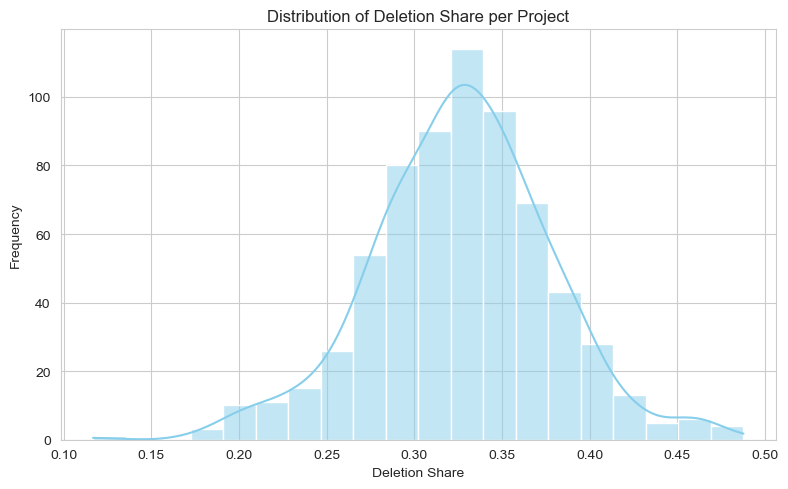

In [ ]:
 # plot deletion share per project
plt.figure(figsize=(8,5))
sns.histplot(project_deletion_share, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Deletion Share per Project')
plt.xlabel('Deletion Share')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

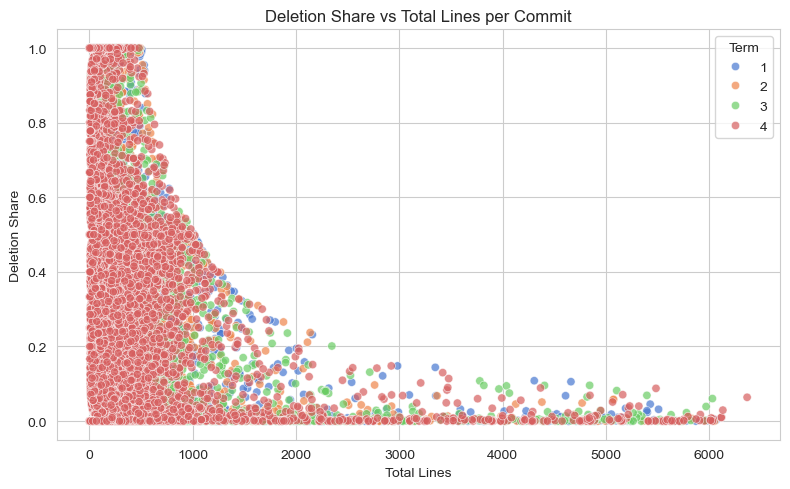

In [222]:
# scatter plot deletion share vs total lines per project colored by term
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df, 
    x='Total Lines', 
    y='Deletion Share', 
    hue='Term', 
    palette='muted', 
    alpha=0.7
)
plt.title('Deletion Share vs Total Lines per Commit')
plt.xlabel('Total Lines')
plt.ylabel('Deletion Share')
plt.tight_layout()
plt.show()


In [227]:
df.columns

Index(['GenAI Period', 'Term', 'Project', 'Author Name', 'Author Email',
       'Date', 'Repository', 'Insertions', 'Deletions', 'Total Lines',
       'Files Changed', 'Diff Lines', 'Unit Size (DMM)', 'Complexity (DMM)',
       'Interface (DMM)', 'Commit Hash', 'Merge Commit', 'Default Branch',
       'Deletion Share'],
      dtype='object')

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2162949229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


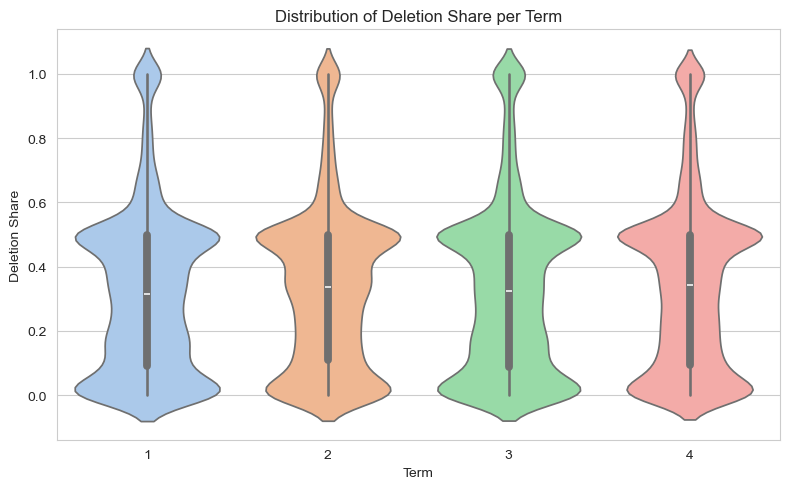

In [230]:
# Create Violin plot for Deletion Share per Term
plt.figure(figsize=(8,5))
sns.violinplot(
    data=df, 
    x='Term', 
    y='Deletion Share', 
    palette='pastel'
)
plt.title('Distribution of Deletion Share per Term')
plt.xlabel('Term')
plt.ylabel('Deletion Share')
plt.tight_layout()
plt.show()


C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\1720696371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


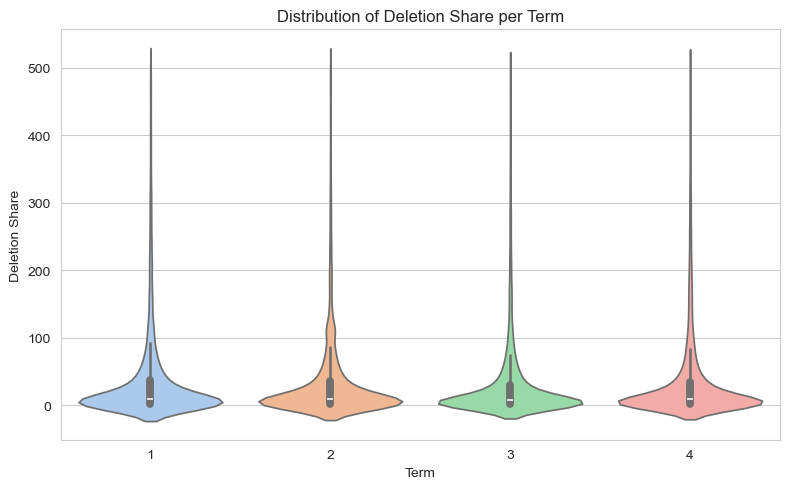

In [234]:
# Create Violin plot for Deletion Share per Term
plt.figure(figsize=(8,5))
sns.violinplot(
    data=df, 
    x='Term', 
    y='Deletions', 
    palette='pastel'
)
plt.title('Distribution of Deletion Share per Term')
plt.xlabel('Term')
plt.ylabel('Deletion Share')
plt.tight_layout()
plt.show()

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2958008295.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


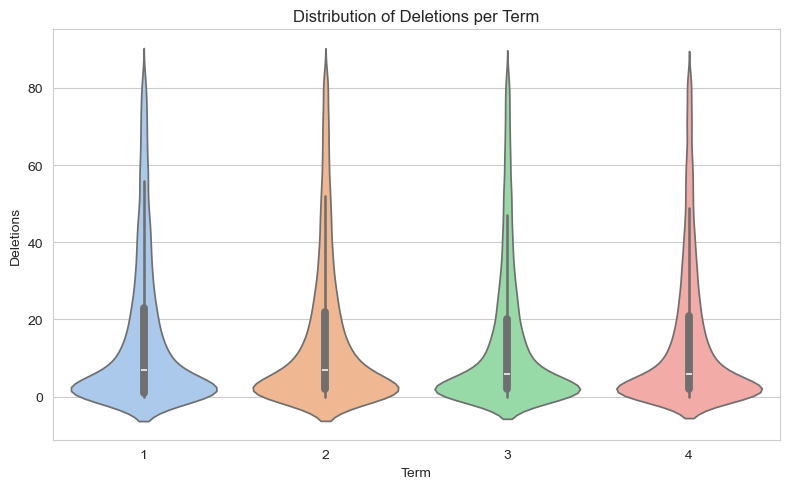

In [242]:
dfc = df.copy()
dfc = remove_outliers(dfc, "Deletions")
# Create Violin plot for Deletion Share per Term
plt.figure(figsize=(8,5))
sns.violinplot(
    data=dfc, 
    x='Term', 
    y='Deletions', 
    palette='pastel'
)
plt.title('Distribution of Deletions per Term')
plt.xlabel('Term')
plt.ylabel('Deletions')
plt.tight_layout()
plt.show()

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2975973296.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


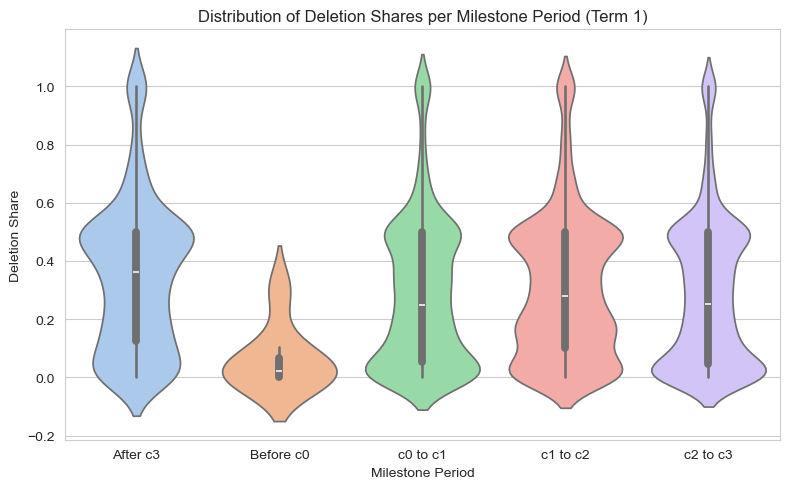

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2975973296.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


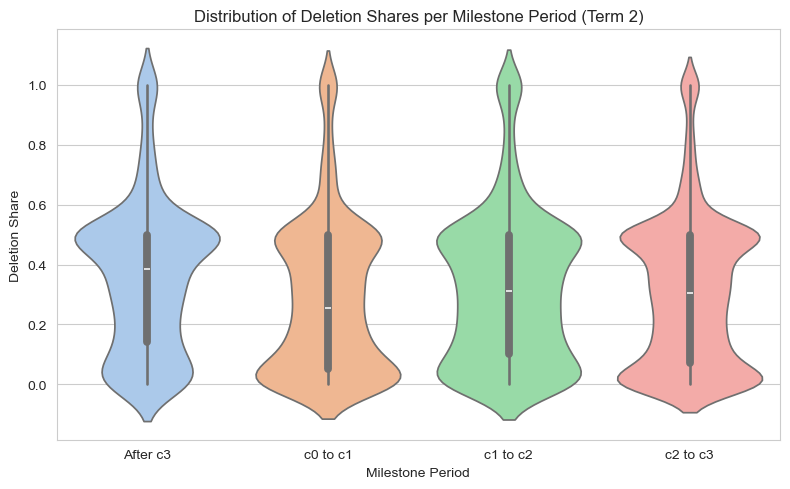

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2975973296.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


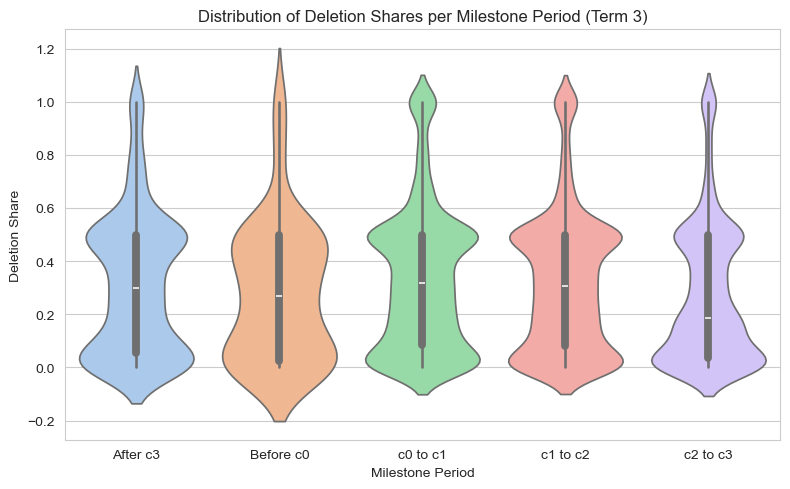

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\2975973296.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


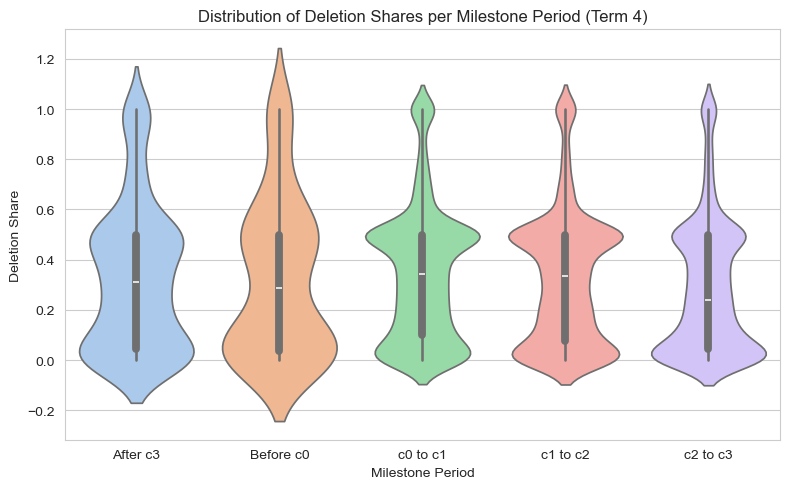

In [248]:
# assign each commit to a milestone based on date
def assign_milestone(row):
    term = row['Term']
    commit_date = row['Date'].date()
    
    # Get deadlines for the term
    c0_date = dt.datetime.strptime(term_deadlines[(term-1)*4], "%Y-%m-%d").date()
    c1_date = dt.datetime.strptime(term_deadlines[(term-1)*4 + 1], "%Y-%m-%d").date()
    c2_date = dt.datetime.strptime(term_deadlines[(term-1)*4 + 2], "%Y-%m-%d").date()
    c3_date = dt.datetime.strptime(term_deadlines[(term-1)*4 + 3], "%Y-%m-%d").date()
    
    if commit_date < c0_date:
        return 'Before c0'
    elif c0_date <= commit_date < c1_date:
        return 'c0 to c1'
    elif c1_date <= commit_date < c2_date:
        return 'c1 to c2'
    elif c2_date <= commit_date < c3_date:
        return 'c2 to c3'
    else:
        return 'After c3'

dfc = df.copy()
dfc = remove_outliers(dfc, "Deletions")

dfc['Milestone Period'] = dfc.apply(assign_milestone, axis=1)

dfc = dfc.sort_values(by=['Term', 'Milestone Period'])

for term in sorted(dfc["Term"].unique()):
    dfc_term = dfc[dfc['Term'] == term]
    # Create Violin plot for Deletion Share per Term
    plt.figure(figsize=(8,5))
    sns.violinplot(
        data=dfc_term, 
        x='Milestone Period', 
        y='Deletion Share', 
        palette='pastel'
    )
    plt.title(f'Distribution of Deletion Shares per Milestone Period (Term {term})')
    plt.xlabel('Milestone Period')
    plt.ylabel('Deletion Share')
    plt.tight_layout()
    plt.show()

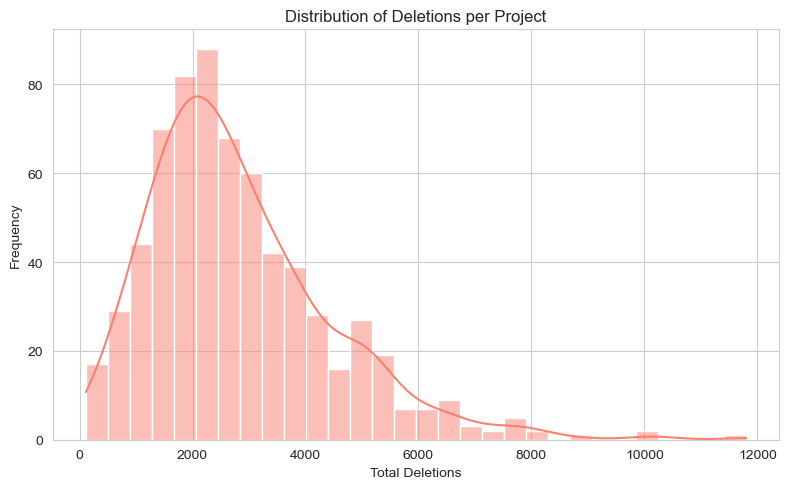

In [233]:
# Deletions per project distribution visualization
deletions_per_project = df.groupby('Project')['Deletions'].sum()
plt.figure(figsize=(8,5))
sns.histplot(
    deletions_per_project, 
    bins=30, 
    kde=True, 
    color='salmon'
)
plt.title('Distribution of Deletions per Project')
plt.xlabel('Total Deletions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [228]:
# functions to create plots

# terms are colored

# helper functions to create 3 plots (scatter, scatter without outliers, violin without outliers) per column (attribute)

def create_scatterplot(dataframe, column, axes):
    # return sns.scatterplot(data=dataframe, x=dataframe.index, y=column, hue="term", palette="Set1", ax=axes)

    return sns.scatterplot(
        data=dataframe.reset_index(drop=True),
        x=dataframe.reset_index(drop=True).index,
        y=column,
        # hue="term",
        palette="Set1",
        ax=axes
    )

# remove outliers datapoints of certain column (attribute) based on box plots min and max (IQR rule)
def remove_outliers(dataframe, column):
    q1, q3 = dataframe[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df_no_outliers = dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]
    return df_no_outliers

# calculates the mean per term, writes on mean height in the middle of the term, in black on a white box
def add_mean(dataframe, column, axes):
        term_means = dataframe.groupby("term")[column].mean()
        new_term_sizes = [152, 139, 181, 200]  # new term dimension list of cleaned df with incomplete projects removed
        term_starts = [0] + list(pd.Series(new_term_sizes).cumsum()[:-1])  # starting index of each term
        term_mids = [start + size // 2 for start, size in zip(term_starts, new_term_sizes)]
                
        for (term, mean), x_mid in zip(term_means.items(), term_mids):
            axes.text(
                x_mid, mean, f"{mean:.1f}", # position and mean rounded to 1 digit behind the comma
                ha="center", va="center",
                fontsize=9, fontweight="bold",
                bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=1) # white background box
            )

# use with dataframe without outliers for better results
def create_violinplot(dataframe, column, axes):
    return sns.violinplot(data=dataframe, x="term", y=column, ax=axes, hue="term", palette="Set1", inner="box")

# not implemented
# create scatterplot with outliers removed --> use create_scatterplot with different dataframe
# create box plot
# create scatterplot with values sorted
# create facet grid with shared axis

C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\774929089.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  return sns.scatterplot(
C:\Users\yanni\AppData\Local\Temp\ipykernel_9496\774929089.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  return sns.scatterplot(


KeyError: 'term'

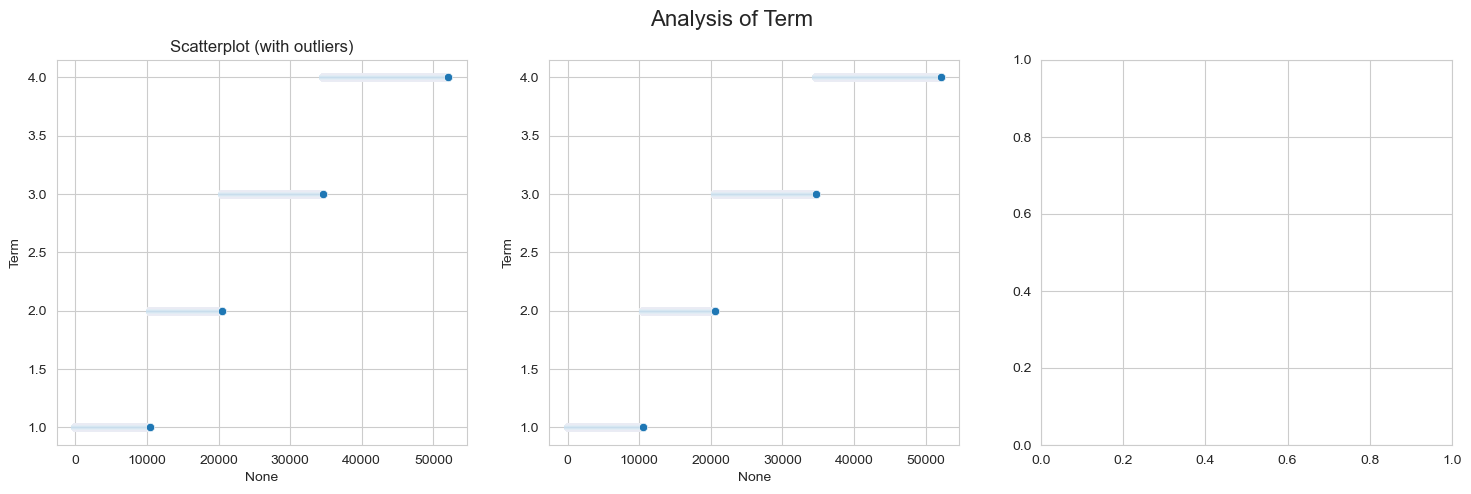

In [229]:
# Plots for presentation of the supervisor meeting slides 280825
import re

# functions to create 3 plots (scatter, scatter without outliers, violin without outliers) per column (attribute)
def create_plots(df=df):
    # numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # loop through numeric columns
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f"Analysis of {col}", fontsize=16)
        
        # 1. Scatterplot (all data)
        create_scatterplot(dataframe=df, column=col, axes=axes[0])
        # add mean
        axes[0].set_title("Scatterplot (with outliers)")
    
        # 2. Scatterplot (outliers removed, using IQR rule)
        df_no_outliers = remove_outliers(df, col)
        create_scatterplot(dataframe=df_no_outliers, column=col, axes=axes[1])
        # mean numbers
        add_mean(dataframe=df_no_outliers, column=col, axes=axes[1])  
        axes[1].set_title("Scatterplot (outliers removed)")
    
        # 3. Distribution plot (box OR violin)
        create_violinplot(dataframe=df_no_outliers, column=col, axes=axes[2])
        axes[2].set_title("Violin plot")
        
        plt.tight_layout()

        

        safe_col = re.sub(r"[\\/]", "_", col)  # replace / and \ with _
        
        # plt.savefig(f"plots_090925/plot {safe_col}.svg", format="svg")
        # plt.savefig(f"plots_090925/plot {col}.svg", format="svg") # store them to folder - update date
        # plt.savefig(f"plots_061025/plot {safe_col} _minuesproject626.svg", format="svg")
        # plt.savefig(f"{foldername}/plot {safe_col} sorted -minusproject626.svg", format="svg")
        
        # plt.savefig(f"{foldername}/plot {safe_col}.svg", format="svg")
        
        # plt.show() # show them in notebook

# call function
create_plots()

# Authoren Ordering (always 2 authors per project)


# Next 2

# Next?